In [1]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [2]:
tempTopDir = os.path.abspath('/Volumes/Britt_SSD/Singularity/TrainingSlimmed')
combo_df = pd.DataFrame()

In [3]:
fear = os.path.join(tempTopDir, 'FearGhostsTrainingDB.parquet')
normalOnly = os.path.join(tempTopDir, 'NormalPillsOnlyDB.parquet')
normalPlus = os.path.join(tempTopDir, 'NormalPillsInGameDB.parquet')
powerPill = os.path.join(tempTopDir, 'PowerPillsOnlyDB.parquet')
standard = os.path.join(tempTopDir, 'StandardScoringOnlyDB.parquet')

In [4]:
fear_df = pd.read_parquet(fear)
fear_df = fear_df.drop(columns=fear_df.columns[0])

In [5]:
normalOnly_df = pd.read_parquet(normalOnly)
normalOnly_df = normalOnly_df.drop(columns=normalOnly_df.columns[0])

In [6]:
normalPlus_df = pd.read_parquet(normalPlus)
normalPlus_df = normalPlus_df.drop(columns=normalPlus_df.columns[0])

In [7]:
pp_df = pd.read_parquet(powerPill)
pp_df = pp_df.drop(columns=pp_df.columns[0])

In [8]:
std_df = pd.read_parquet(standard)
std_df = std_df.drop(columns=std_df.columns[0])

In [9]:
combo_df = pd.concat([fear_df,normalOnly_df,normalPlus_df,pp_df,std_df],ignore_index=True)


In [10]:
df_list = [fear_df, normalOnly_df, normalPlus_df, pp_df, std_df]

In [11]:
combo_df.columns

Index(['reward', 'episode_reward', 'epoch_reward', 'total_reward', 'lives',
       'end_of_episode', 'end_of_epoch', 'episode', 'episode_step', 'epoch',
       'epoch_step', 'state', 'mean_reward', 'to_pill_one', 'to_pill_two',
       'to_pill_three', 'to_pill_four', 'to_red_ghost', 'to_pink_ghost',
       'to_blue_ghost', 'to_orange_gohst', 'pacman_coord_x', 'pacman_coord_y',
       'red_ghost_coord_x', 'red_ghost_coord_y', 'pink_ghost_coord_x',
       'pink_ghost_coord_y', 'blue_ghost_coord_x', 'blue_ghost_coord_y',
       'orange_ghost_coord_x', 'orange_ghost_coord_y', 'pacman_direction',
       'red_ghost_direction', 'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghost3_coord_y', 'dark_blue_ghost4_coord_x',
       'dark_blue_ghost4_coord_y', 'action 1 episode sum',
       'action

In [15]:
combo_df["agentNum"]= combo_df["agent"].astype('category')
combo_df["agentNum"] = combo_df["agentNum"].cat.codes
combo_df["agentNum"]

0        0
1        0
2        0
3        0
4        0
        ..
49960    4
49961    4
49962    4
49963    4
49964    4
Name: agentNum, Length: 49965, dtype: int8

In [32]:
combo_df["agent"]

0        Fear_Ghost
1        Fear_Ghost
2        Fear_Ghost
3        Fear_Ghost
4        Fear_Ghost
            ...    
49960      Standard
49961      Standard
49962      Standard
49963      Standard
49964      Standard
Name: agent, Length: 49965, dtype: object

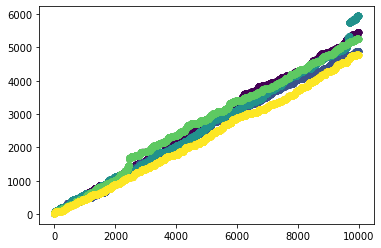

In [33]:
plt.scatter("state", "total_reward", c='agentNum', data=combo_df)

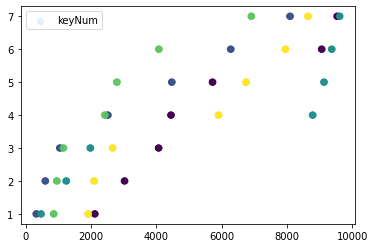

In [34]:
temp = combo_df[combo_df["keyNum"]>0]
plt.scatter("state", "keyNum", c='agentNum', alpha=0.1, data=temp)
plt.legend(loc="best")

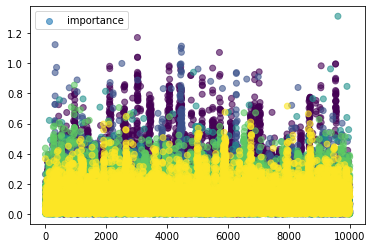

In [35]:
plt.scatter("state", "importance", c='agentNum', alpha=0.6, data=combo_df)
plt.legend(loc="best")

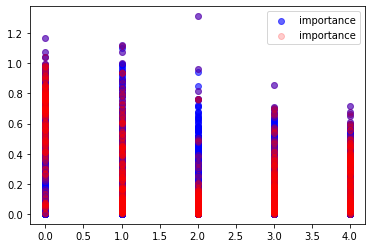

In [36]:
plt.scatter("agentNum", "importance", c="b", alpha=0.6, data=combo_df)
plt.scatter("agentNum", "importance", c="r", alpha=0.2, data=temp)
plt.legend(loc="best")

In [26]:
names = ["Fear_Ghost", "Normal_Only", "Normal_Plus", "Power_Pill", "Standard"]



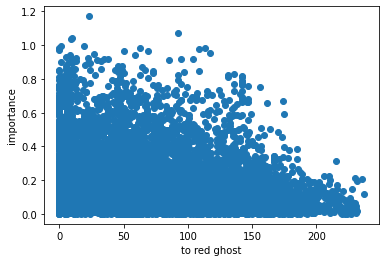

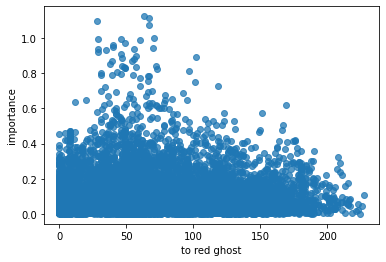

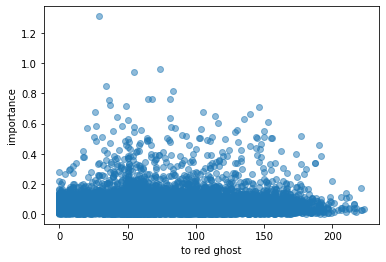

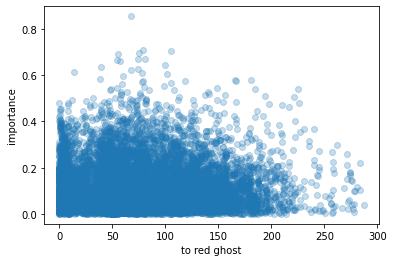

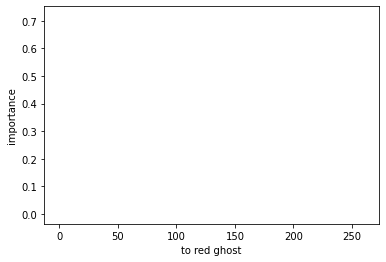

In [43]:
val = 0.25
for index, agent in enumerate(df_list):
    plt.scatter("to_red_ghost", "importance", alpha=1-(val*index), data=agent, label = agent_names[index])
    plt.xlabel("to red ghost")
    plt.ylabel("importance")
    plt.show()

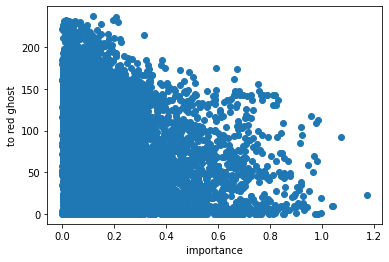

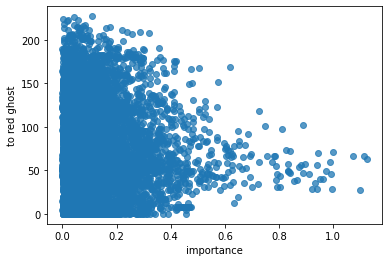

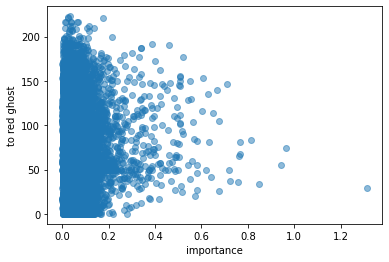

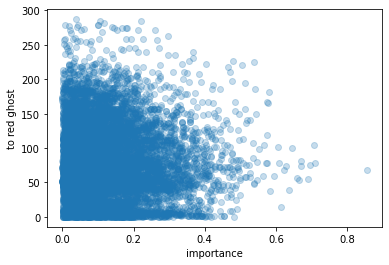

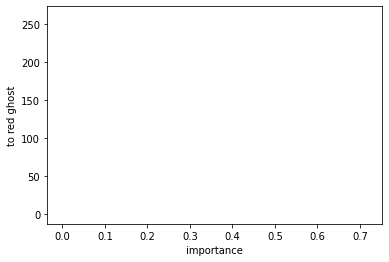

In [44]:
val = 0.25
for index, agent in enumerate(df_list):
    plt.scatter("importance", "to_red_ghost", alpha=1-(val*index), data=agent, label = agent_names[index])
    plt.ylabel("to red ghost")
    plt.xlabel("importance")
    plt.show()

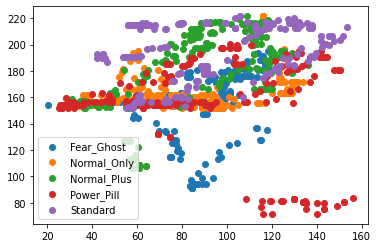

In [45]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_ghosts_mean", "to_top_pills_mean", alpha=1, data=temp, label = agent_names[index])
plt.legend(loc="best")

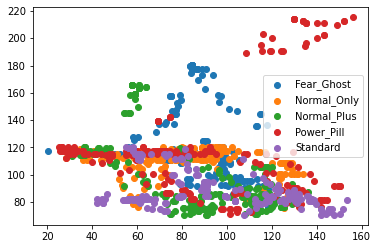

In [46]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_ghosts_mean", "to_bottom_pills_mean", alpha=1, data=temp, label = agent_names[index])
plt.legend(loc="best")

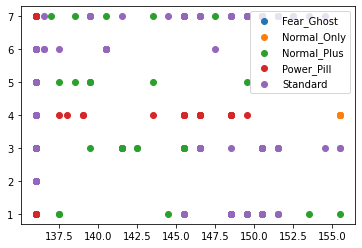

In [47]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_pill_mean", "keyNum", alpha=1, data=temp, label = names[index])
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

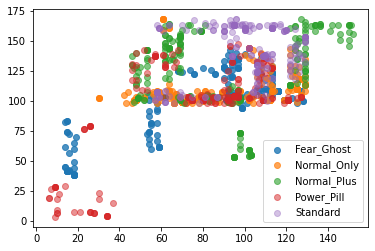

In [48]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=0.8-(val*index), data=temp, label = names[index])
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

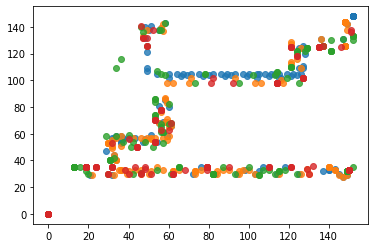

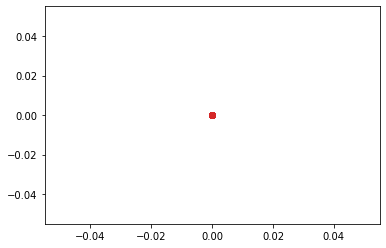

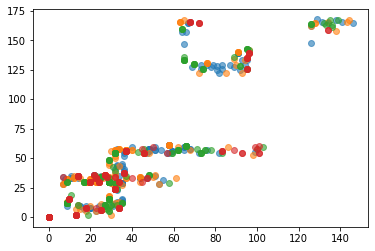

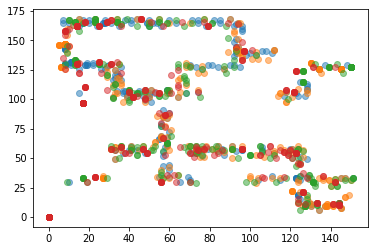

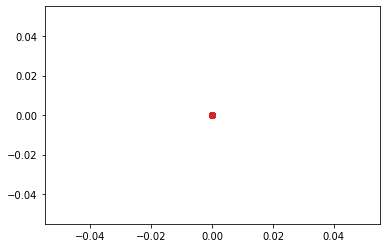

['Fear_Ghost', 'Normal_Only', 'Normal_Plus', 'Power_Pill', 'Standard']

In [49]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("dark_blue_ghost1_coord_x", "dark_blue_ghost1_coord_y", alpha=0.8-(val*index), data=agent)
    plt.scatter("dark_blue_ghost2_coord_x", "dark_blue_ghost2_coord_y", alpha=0.8-(val*index), data=agent)
    plt.scatter("dark_blue_ghost3_coord_x", "dark_blue_ghost3_coord_y", alpha=0.8-(val*index), data=agent)
    plt.scatter("dark_blue_ghost4_coord_x", "dark_blue_ghost4_coord_y", alpha=0.8-(val*index), data=agent)
    plt.show()
names

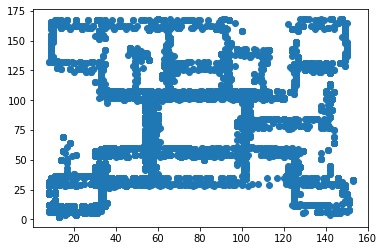

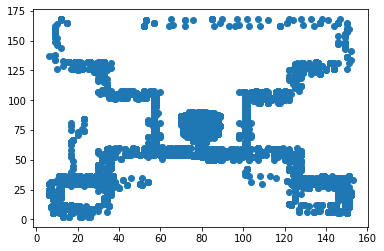

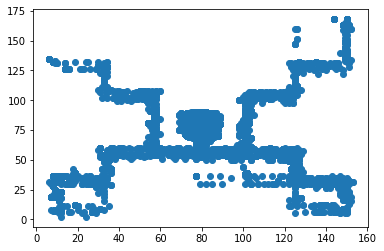

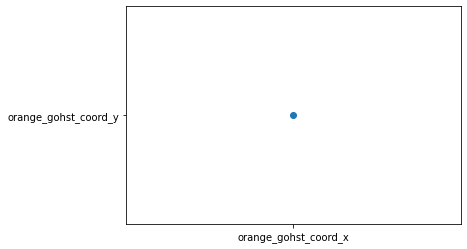

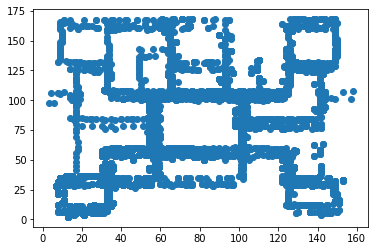

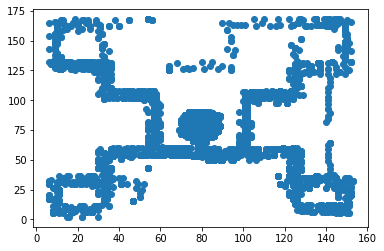

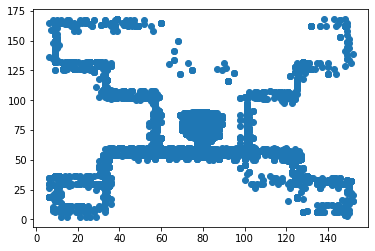

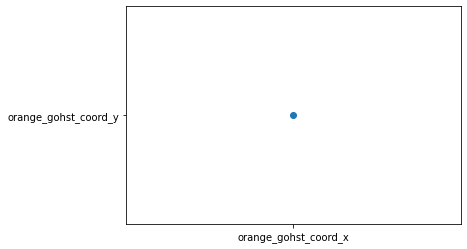

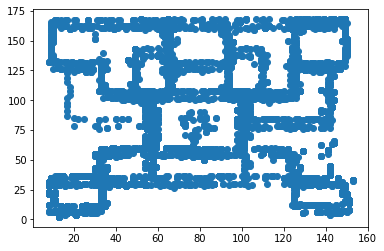

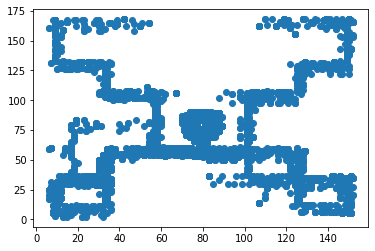

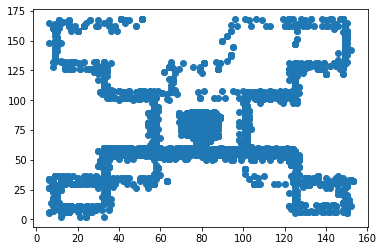

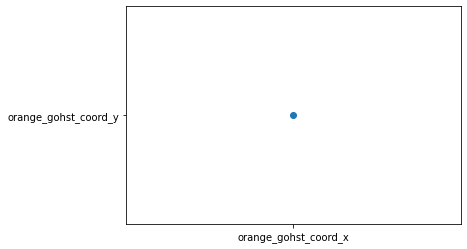

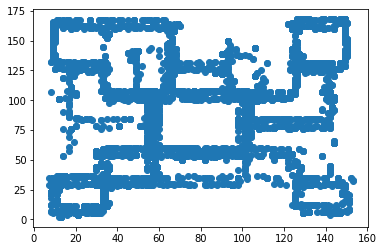

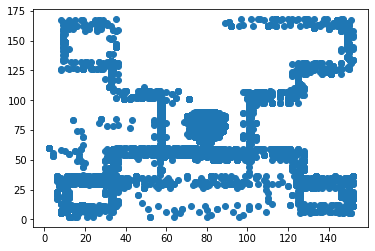

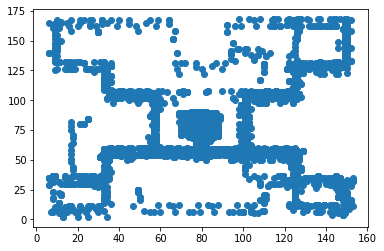

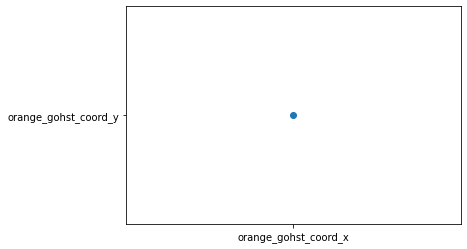

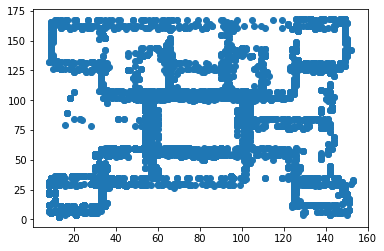

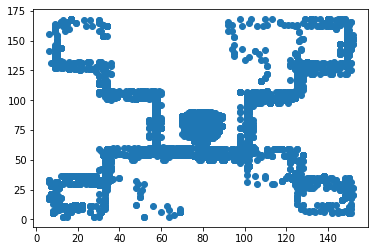

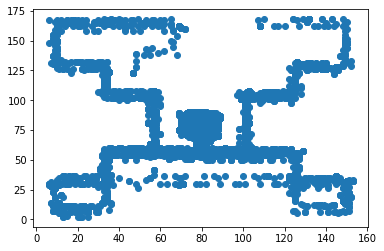

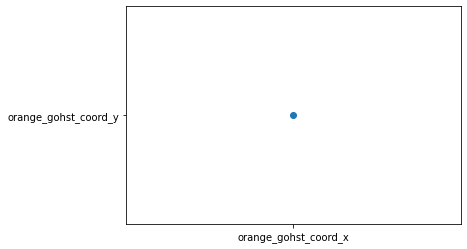

['Fear_Ghost', 'Normal_Only', 'Normal_Plus', 'Power_Pill', 'Standard']

In [50]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=1, data=agent)
    plt.show()
    plt.scatter("blue_ghost_coord_x", "blue_ghost_coord_y", alpha=1, data=agent)
    plt.show()
    plt.scatter("pink_ghost_coord_x", "pink_ghost_coord_y", alpha=1, data=agent)
    plt.show()
    plt.scatter("orange_gohst_coord_x", "orange_gohst_coord_y", alpha=1, data=agent)
    plt.show()
names

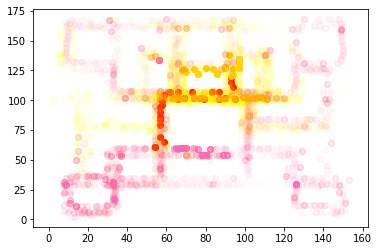

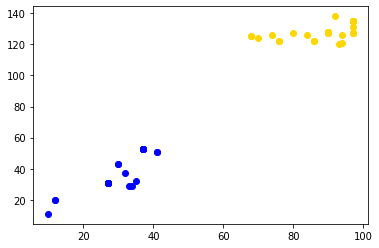

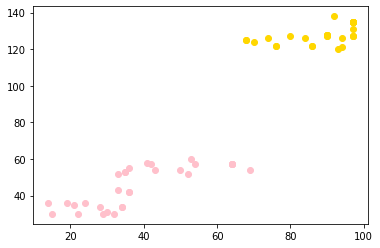

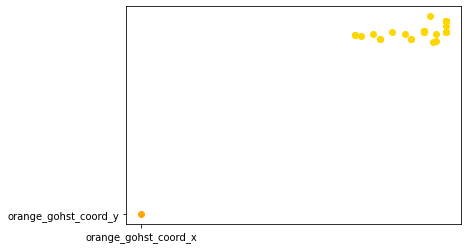

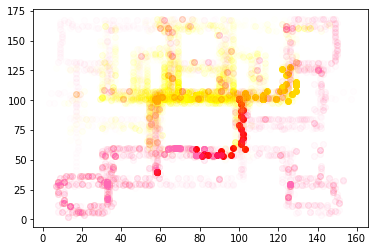

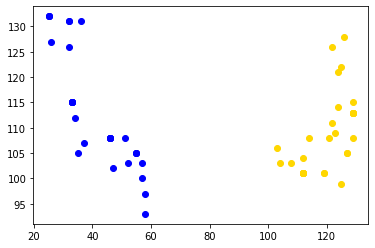

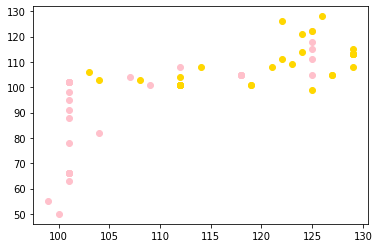

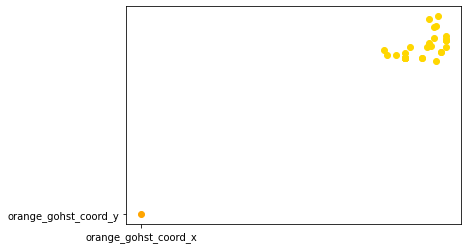

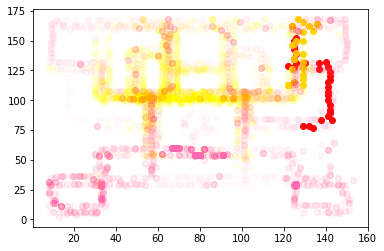

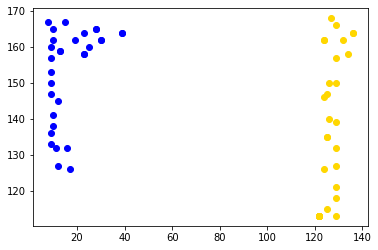

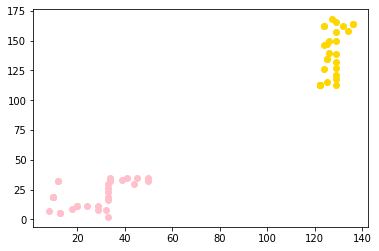

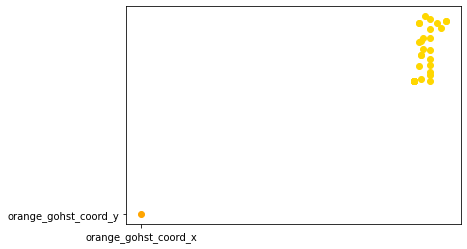

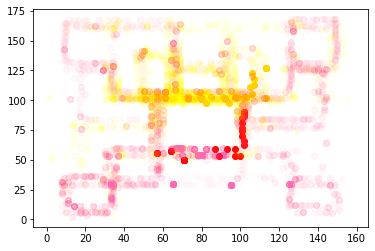

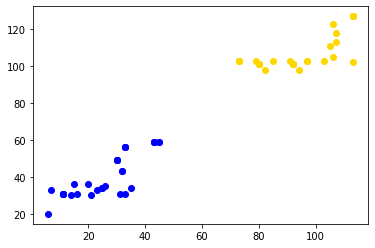

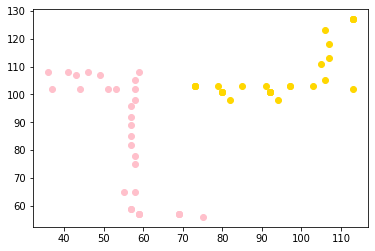

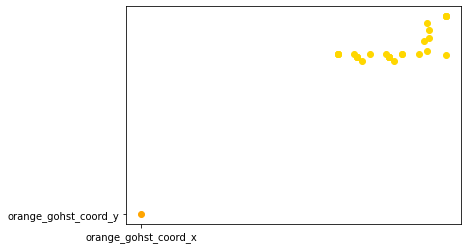

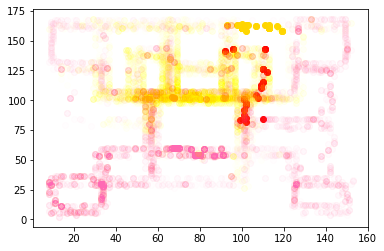

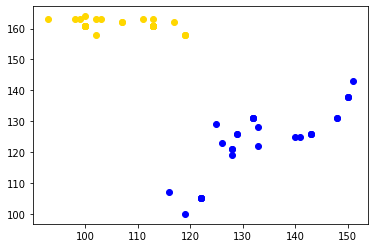

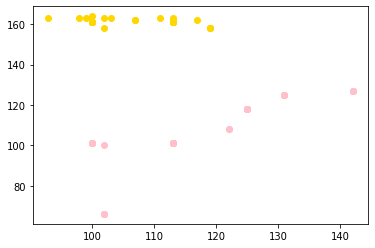

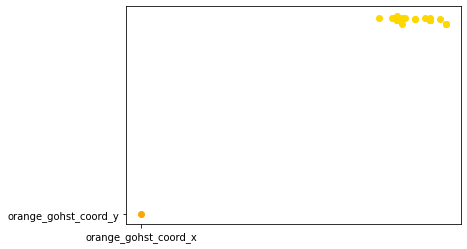

['Fear_Ghost', 'Normal_Only', 'Normal_Plus', 'Power_Pill', 'Standard']

In [51]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]==1]
    plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=1, c="r", data=temp)
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=1, c="gold", data=temp)
    plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=0.01, c="hotpink", data=agent)
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=0.01, c="yellow", data=agent)
    plt.show()
    plt.scatter("blue_ghost_coord_x", "blue_ghost_coord_y", alpha=1, c="b", data=temp)
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=1, c="gold",  data=temp)
    plt.show()
    plt.scatter("pink_ghost_coord_x", "pink_ghost_coord_y", alpha=1, c="pink", data=temp)
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=1, c="gold",  data=temp)
    plt.show()
    plt.scatter("orange_gohst_coord_x", "orange_gohst_coord_y", alpha=1, c="orange", data=temp)
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=1, c="gold",  data=temp)
    plt.show()
names

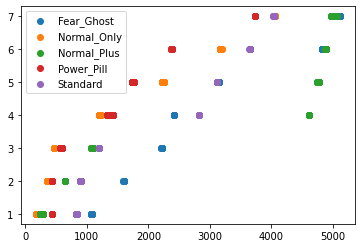

In [52]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("total_reward", "keyNum", alpha=1, data=temp, label = names[index])
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

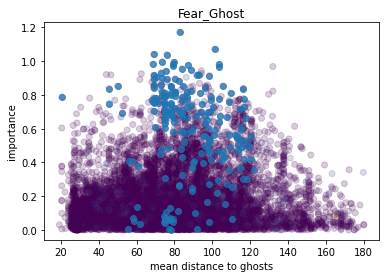

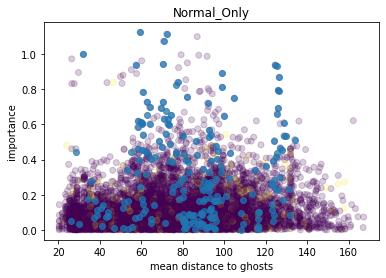

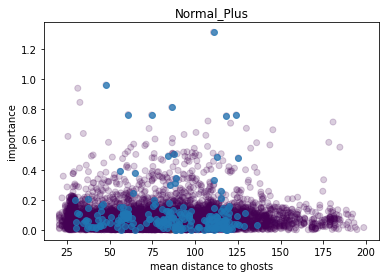

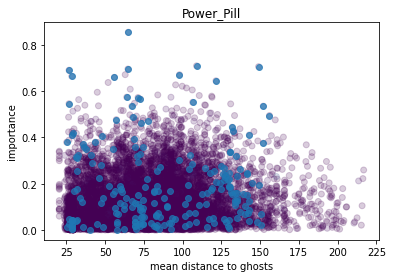

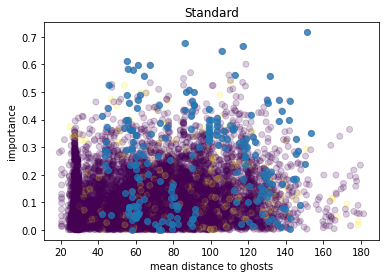

No handles with labels found to put in legend.


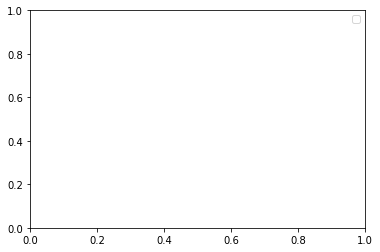

In [83]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_ghosts_mean", "importance", alpha=0.2, data=agent, c="reward", label = names[index])
    plt.scatter("to_ghosts_mean", "importance", alpha=0.72, data=temp, label = names[index])
    plt.title(names[index])
    plt.ylabel("importance")
    plt.xlabel("mean distance to ghosts")
    plt.show()
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
plt.legend(loc="best")

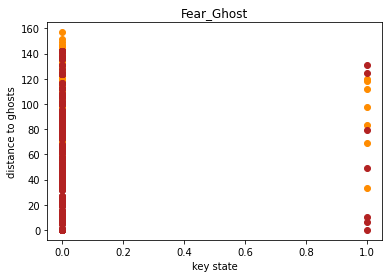

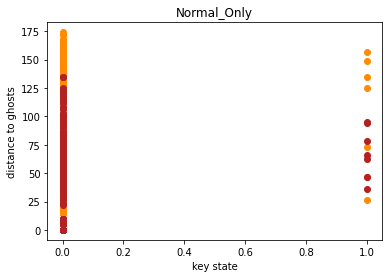

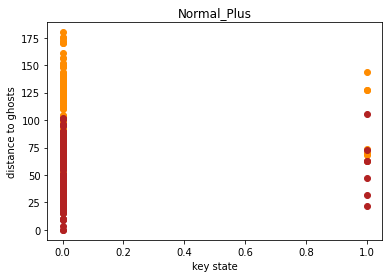

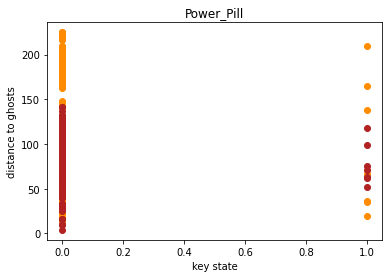

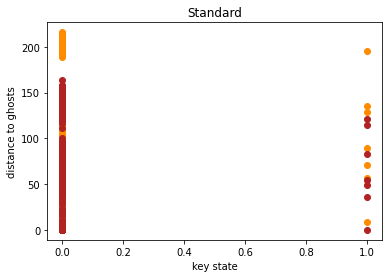

In [76]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("key_state", "to_orange_gohst", alpha=1, data=temp, label = names[index], c= "darkorange")
    plt.scatter("key_state", "to_red_ghost", alpha=1, data=temp, label = names[index], c= "firebrick")
    plt.title(names[index])
    plt.xlabel("key state")
    plt.ylabel("distance to ghosts")
    plt.show()
    #     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
# plt.legend(loc="best")

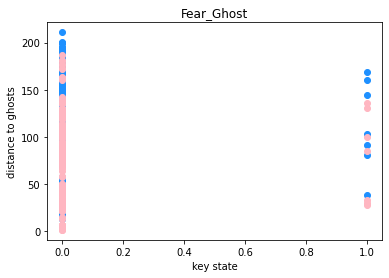

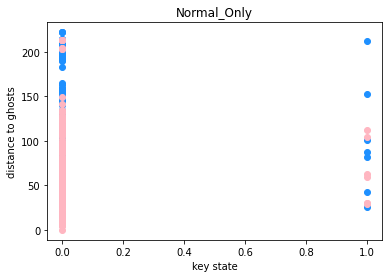

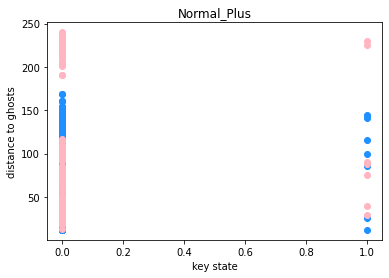

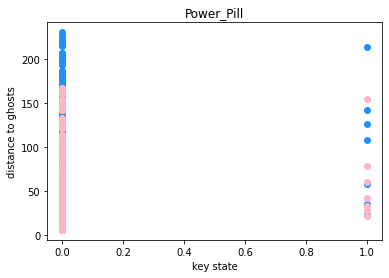

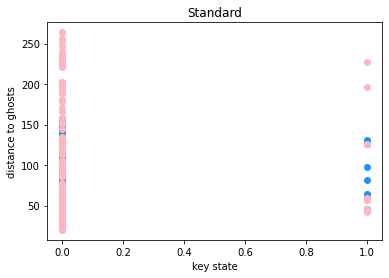

In [75]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("key_state", "to_blue_ghost", alpha=1, data=temp, label = names[index], c= "dodgerblue")
    plt.scatter("key_state", "to_pink_ghost", alpha=1, data=temp, label = names[index], c= "lightpink")
    plt.title(names[index])
    plt.xlabel("key state")
    plt.ylabel("distance to ghosts")
    plt.show()
    #     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])

In [56]:
combo_df.columns

Index(['reward', 'episode_reward', 'epoch_reward', 'total_reward', 'lives',
       'end_of_episode', 'end_of_epoch', 'episode', 'episode_step', 'epoch',
       'epoch_step', 'state', 'mean_reward', 'to_pill_one', 'to_pill_two',
       'to_pill_three', 'to_pill_four', 'to_red_ghost', 'to_pink_ghost',
       'to_blue_ghost', 'to_orange_gohst', 'pacman_coord_x', 'pacman_coord_y',
       'red_ghost_coord_x', 'red_ghost_coord_y', 'pink_ghost_coord_x',
       'pink_ghost_coord_y', 'blue_ghost_coord_x', 'blue_ghost_coord_y',
       'orange_ghost_coord_x', 'orange_ghost_coord_y', 'pacman_direction',
       'red_ghost_direction', 'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghost3_coord_y', 'dark_blue_ghost4_coord_x',
       'dark_blue_ghost4_coord_y', 'action 1 episode sum',
       'action

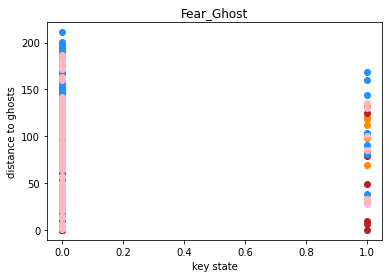

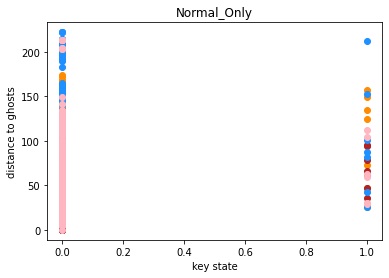

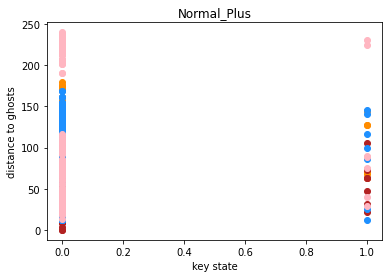

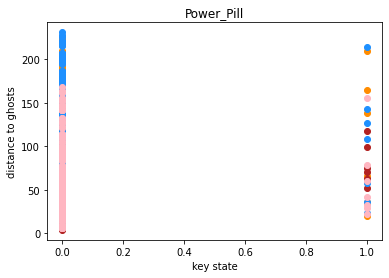

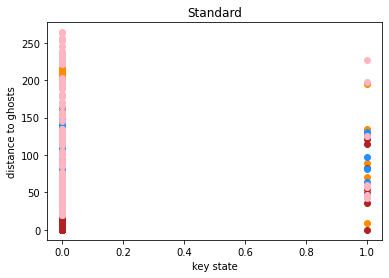

In [74]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("key_state", "to_orange_gohst", alpha=1, data=temp, label = names[index], c= "darkorange")
    plt.scatter("key_state", "to_red_ghost", alpha=1, data=temp, label = names[index], c= "firebrick")
    plt.scatter("key_state", "to_blue_ghost", alpha=1, data=temp, label = names[index], c= "dodgerblue")
    plt.scatter("key_state", "to_pink_ghost", alpha=1, data=temp, label = names[index], c= "lightpink")
    plt.title(names[index])
    plt.xlabel("key state")
    plt.ylabel("distance to ghosts")
    plt.show()
    #     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])

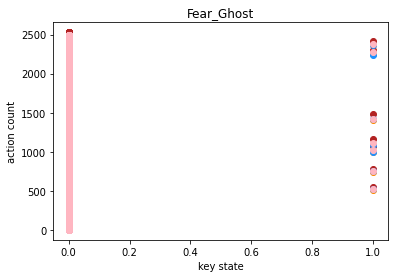

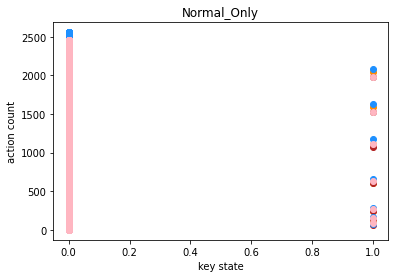

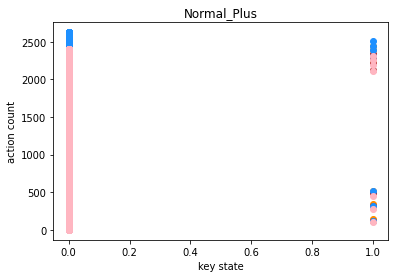

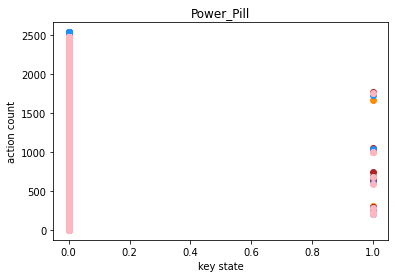

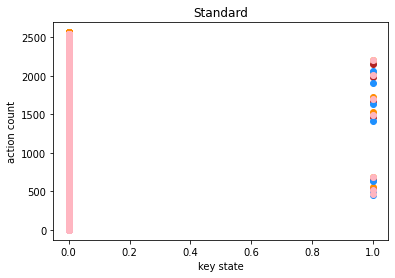

In [73]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("key_state", "action 1 total sum", alpha=1, data=agent, label = names[index], c= "darkorange")
    plt.scatter("key_state", "action 2 total sum", alpha=1, data=agent, label = names[index], c= "firebrick")
    plt.scatter("key_state", "action 3 total sum", alpha=1, data=agent, label = names[index], c= "dodgerblue")
    plt.scatter("key_state", "action 4 total sum", alpha=1, data=agent, label = names[index], c= "lightpink")
    plt.title(names[index])
    plt.xlabel("key state")
    plt.ylabel("action count")
    plt.show()
    #     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])

In [59]:
combo_df["red_ghost_direction"]

0        [-2, -2]
1         [-6, 4]
2         [-6, 4]
3         [-6, 4]
4         [-6, 4]
           ...   
49960     [-3, 5]
49961     [-3, 5]
49962     [-3, 5]
49963     [-3, 5]
49964     [-3, 5]
Name: red_ghost_direction, Length: 49965, dtype: object

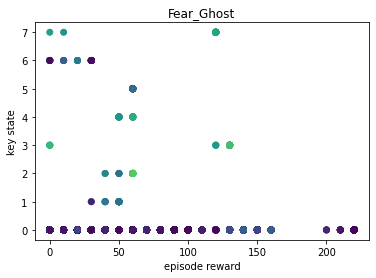

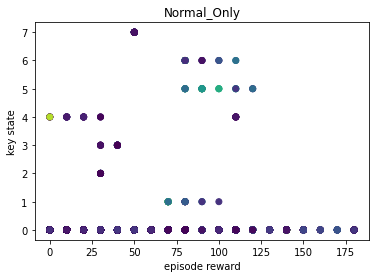

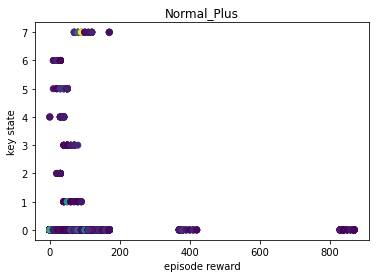

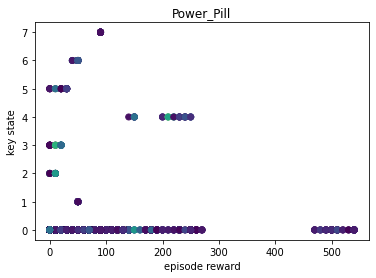

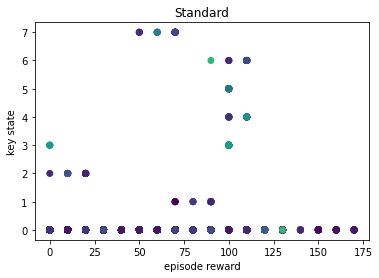

In [72]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("episode_reward", "keyNum", c="importance", alpha=1, data=agent, label = names[index])
    plt.title(names[index])
    plt.xlabel("episode reward")
    plt.ylabel("key state")
    plt.show()
#     plt.scatter("to_pill_mean", "keyNum", alpha=0.1, data=agent, label = names[index])
# plt.legend(loc="best")

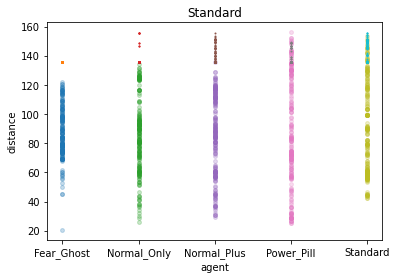

In [66]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("agent", "to_ghosts_mean", alpha=0.25, s=15, data=temp, label = names[index])
    plt.scatter("agent", "to_pill_mean", alpha=1, s=1, data=temp, label = names[index])
    plt.title(names[index])
    plt.xlabel("agent")
    plt.ylabel("distance")

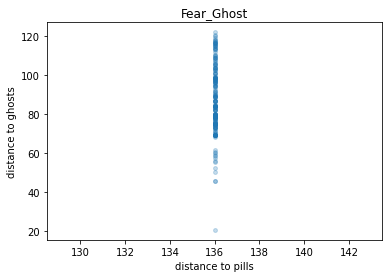

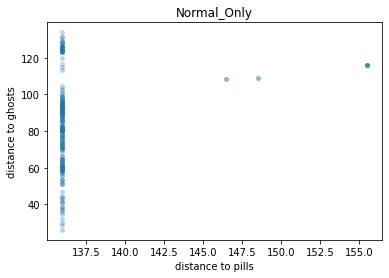

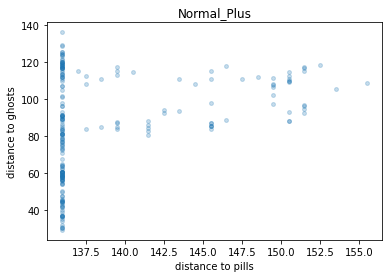

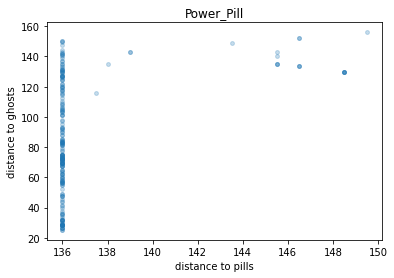

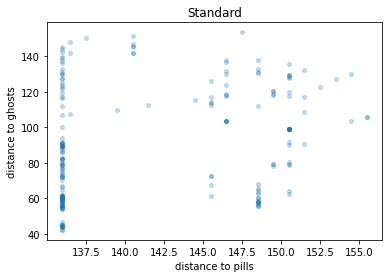

['Fear_Ghost', 'Normal_Only', 'Normal_Plus', 'Power_Pill', 'Standard']

In [65]:
val = 0.25
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_pill_mean", "to_ghosts_mean", alpha=0.25, s=15, data=temp, label = names[index])
    plt.title(names[index])
    plt.xlabel("distance to pills")
    plt.ylabel("distance to ghosts")
    plt.show()
names

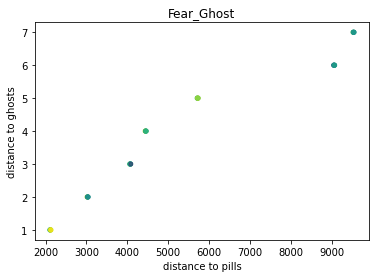

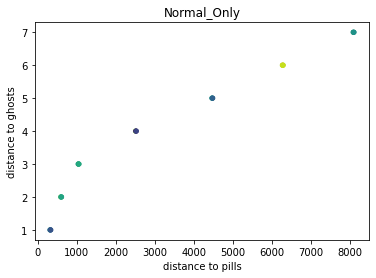

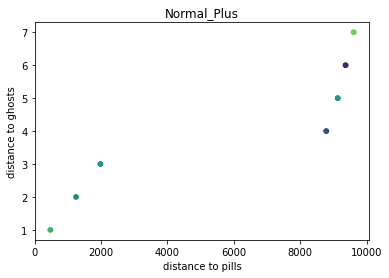

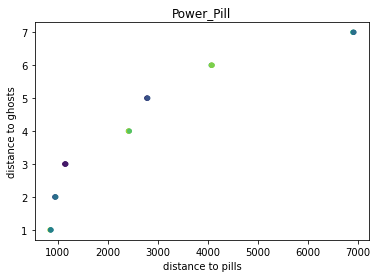

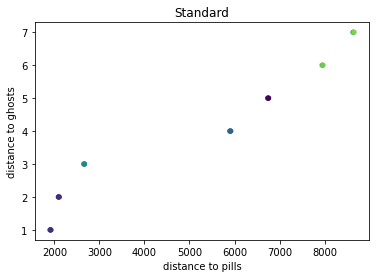

['Fear_Ghost', 'Normal_Only', 'Normal_Plus', 'Power_Pill', 'Standard']

In [64]:
val = 0.25
stringsss = ["a", "b", "c", "d", "e"]
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("state", "keyNum", c="to_ghosts_mean", alpha=0.25, s=15, data=temp, label = names[index])
    plt.title(names[index])
    plt.xlabel("distance to pills")
    plt.ylabel("distance to ghosts")
    plt.show()
names

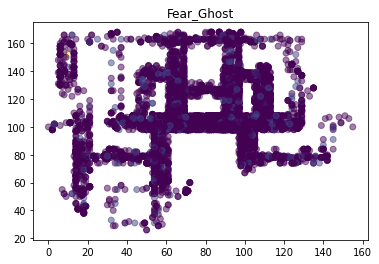

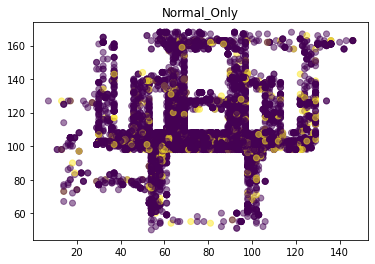

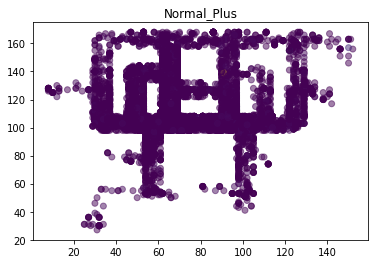

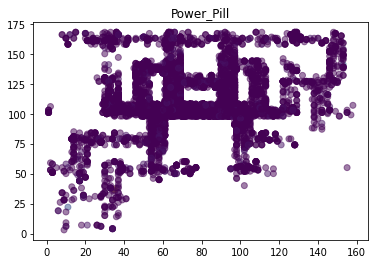

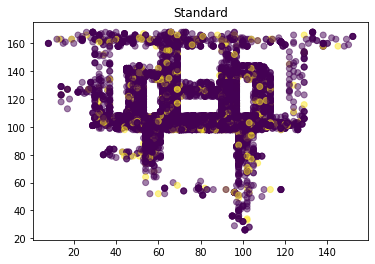

In [87]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]==1]
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=0.5, c="reward", data=agent)
    plt.title(names[index])
    plt.legend
    plt.show()

In [32]:

for index, agent in enumerate(df_list):
    plt.scatter("episode_step","importance",data=agent, c="lives")
    plt.title(names[index])
    plt.legend(['1','2','3'], loc="best")
    plt.show()

AttributeError: module 'seaborn' has no attribute 'theme'

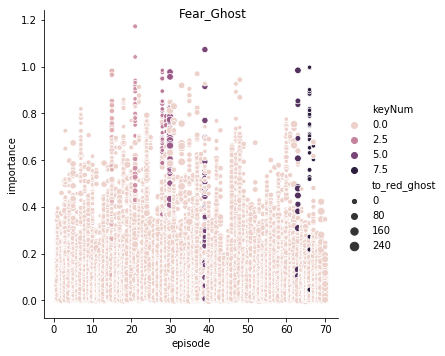

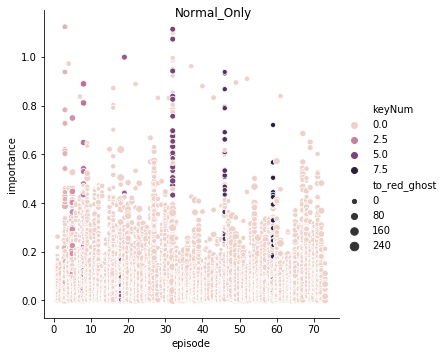

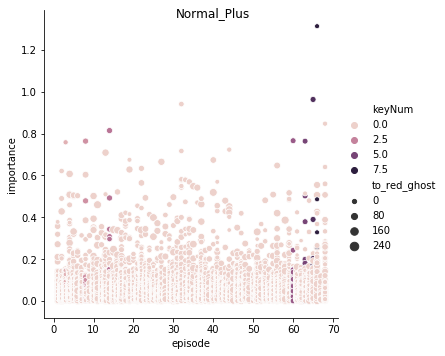

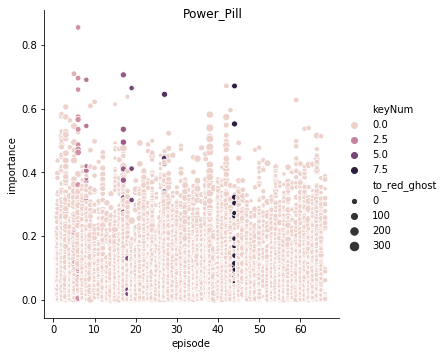

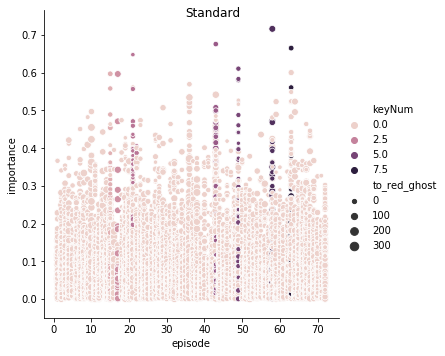

In [51]:
for index, agent in enumerate(df_list):
    ax = sns.relplot(x="episode",y="importance",hue="keyNum",size="to_red_ghost",data=agent)
#     plt.plot("episode","mean_reward",data=agent)
    ax.fig.suptitle(names[index])
    plt.show()

In [60]:
combo_df.columns

Index(['reward', 'episode_reward', 'epoch_reward', 'total_reward', 'lives',
       'end_of_episode', 'end_of_epoch', 'episode', 'episode_step', 'epoch',
       'epoch_step', 'state', 'mean_reward', 'to_pill_one', 'to_pill_two',
       'to_pill_three', 'to_pill_four', 'to_red_ghost', 'to_pink_ghost',
       'to_blue_ghost', 'to_orange_gohst', 'pacman_coord_x', 'pacman_coord_y',
       'red_ghost_coord_x', 'red_ghost_coord_y', 'pink_ghost_coord_x',
       'pink_ghost_coord_y', 'blue_ghost_coord_x', 'blue_ghost_coord_y',
       'orange_ghost_coord_x', 'orange_ghost_coord_y', 'pacman_direction',
       'red_ghost_direction', 'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghost3_coord_y', 'dark_blue_ghost4_coord_x',
       'dark_blue_ghost4_coord_y', 'action 1 episode sum',
       'action

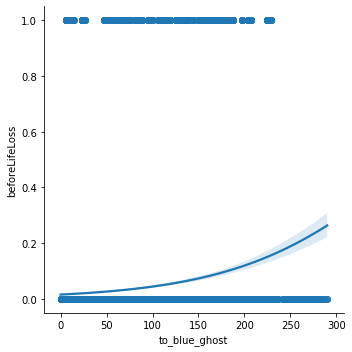

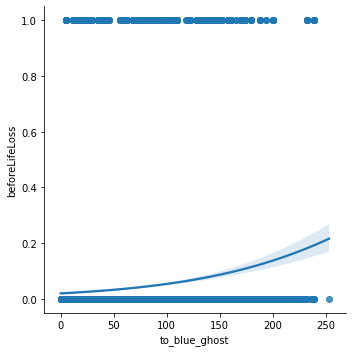

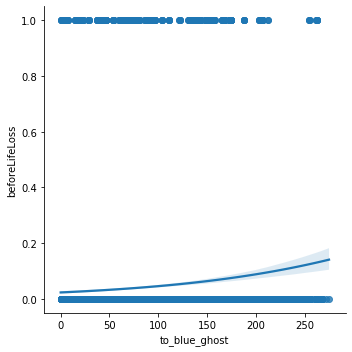

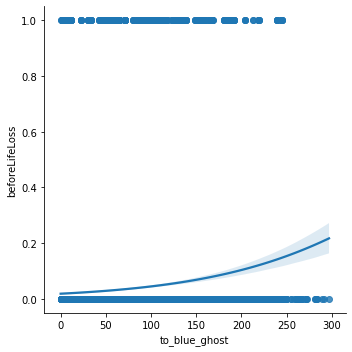

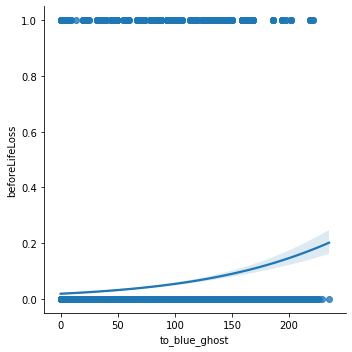

In [64]:
for index, agent in enumerate(df_list):
    ax = sns.lmplot(x="to_blue_ghost",y="beforeLifeLoss",logistic=True,data=agent)
    plt.show()

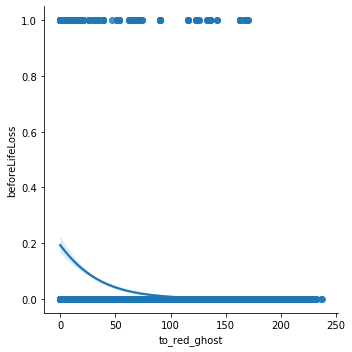

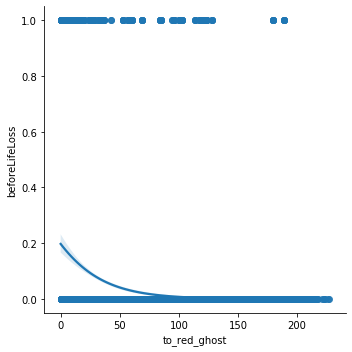

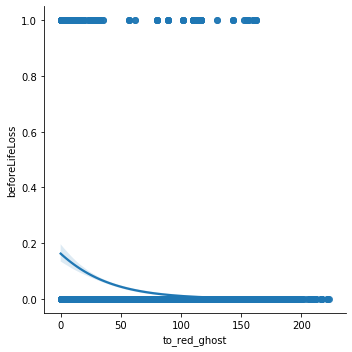

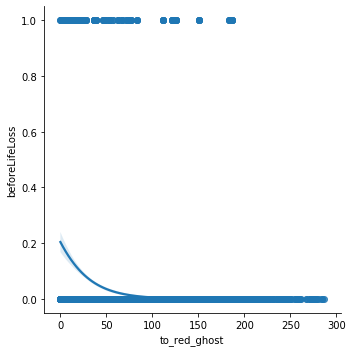

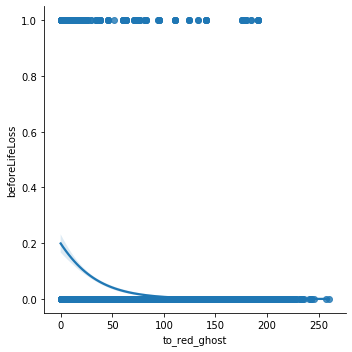

In [65]:
for index, agent in enumerate(df_list):
    ax = sns.lmplot(x="to_red_ghost",y="beforeLifeLoss",logistic=True,data=agent)
    plt.show()

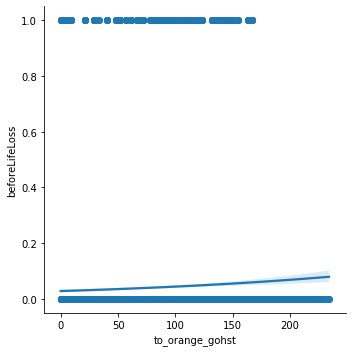

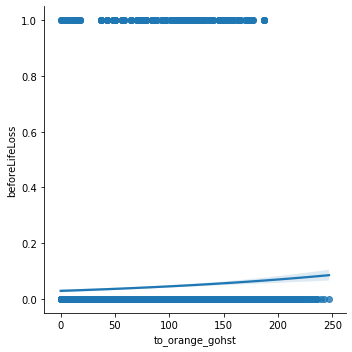

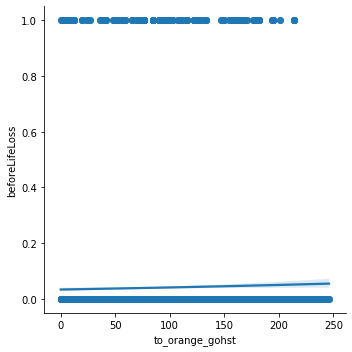

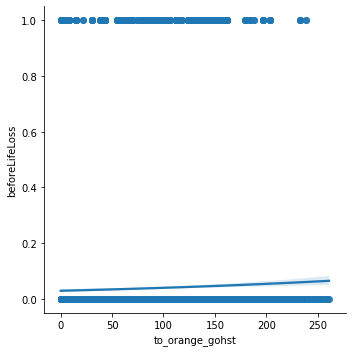

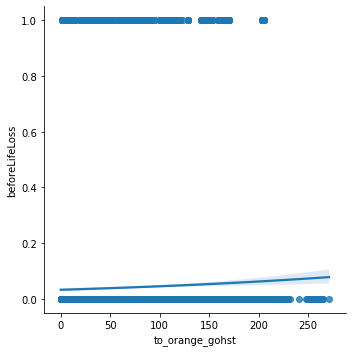

In [66]:
for index, agent in enumerate(df_list):
    ax = sns.lmplot(x="to_orange_gohst",y="beforeLifeLoss",logistic=True,data=agent)
    plt.show()

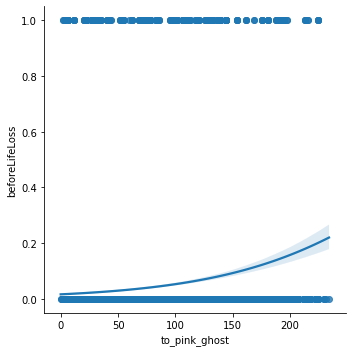

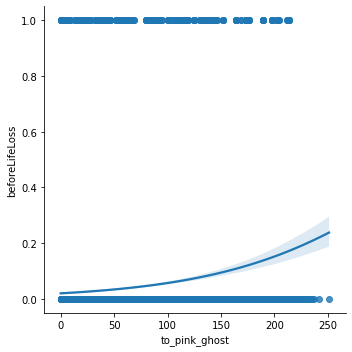

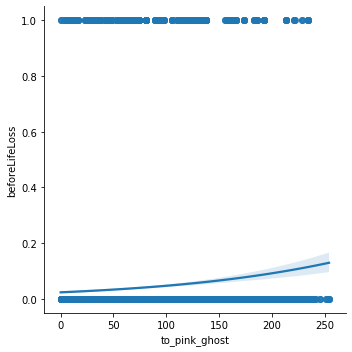

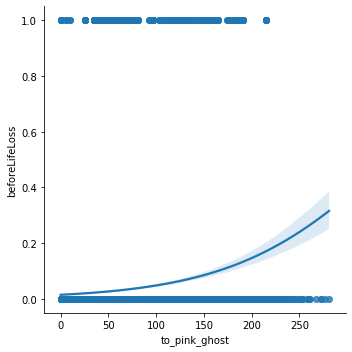

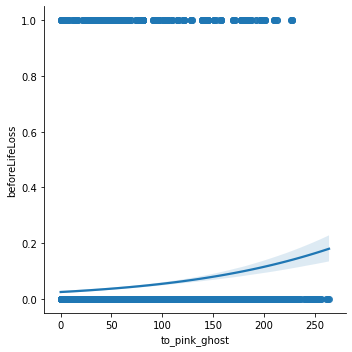

In [67]:
for index, agent in enumerate(df_list):
    ax = sns.lmplot(x="to_pink_ghost",y="beforeLifeLoss",logistic=True,data=agent)
    plt.show()

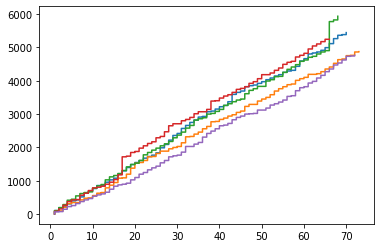

In [218]:
for index, agent in enumerate(df_list):
    plt.plot("episode", "total_reward",data=agent)
#     plt.yscale("log")

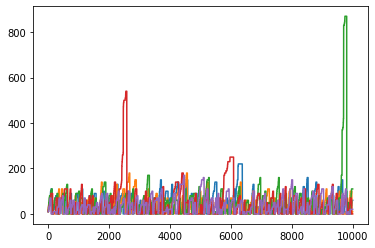

In [219]:
for index, agent in enumerate(df_list):
    plt.plot("state", "episode_reward",data=agent)
#     plt.yscale("log")

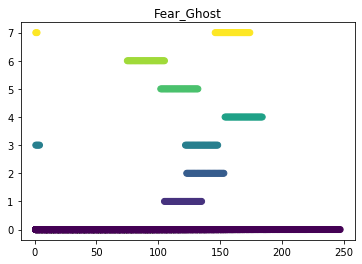

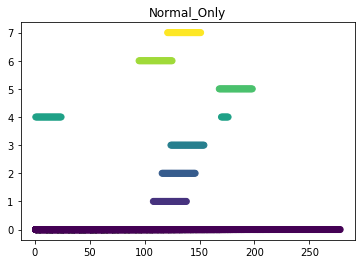

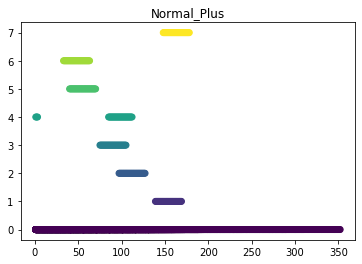

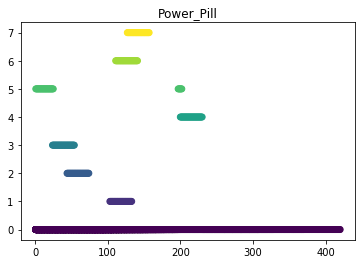

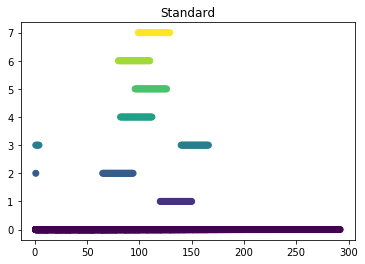

In [79]:
for index, agent in enumerate(df_list):
    plt.scatter("episode_step", "keyNum",c="keyNum",data=agent)
    plt.title(names[index])
    plt.show()

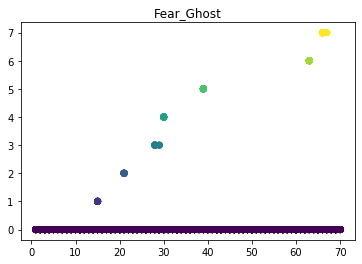

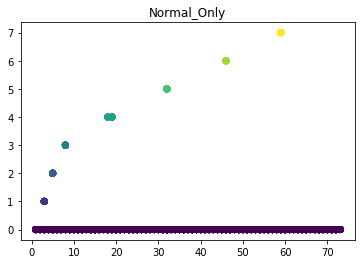

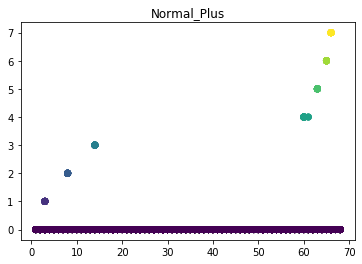

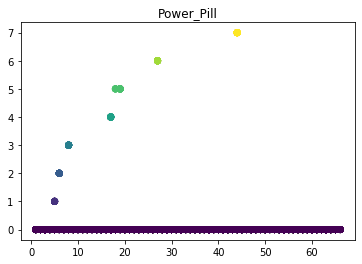

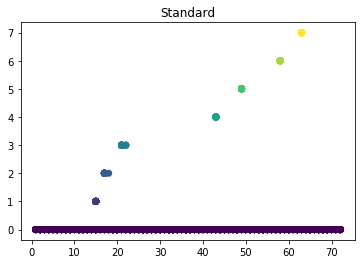

In [80]:
for index, agent in enumerate(df_list):
    plt.scatter("episode", "keyNum",c="keyNum",data=agent)
    plt.title(names[index])
    plt.show()

In [92]:
combo_df.columns

Index(['reward', 'episode_reward', 'epoch_reward', 'total_reward', 'lives',
       'end_of_episode', 'end_of_epoch', 'episode', 'episode_step', 'epoch',
       'epoch_step', 'state', 'mean_reward', 'to_pill_one', 'to_pill_two',
       'to_pill_three', 'to_pill_four', 'to_red_ghost', 'to_pink_ghost',
       'to_blue_ghost', 'to_orange_gohst', 'pacman_coord_x', 'pacman_coord_y',
       'red_ghost_coord_x', 'red_ghost_coord_y', 'pink_ghost_coord_x',
       'pink_ghost_coord_y', 'blue_ghost_coord_x', 'blue_ghost_coord_y',
       'orange_ghost_coord_x', 'orange_ghost_coord_y', 'pacman_direction',
       'red_ghost_direction', 'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghost3_coord_y', 'dark_blue_ghost4_coord_x',
       'dark_blue_ghost4_coord_y', 'action 1 episode sum',
       'action

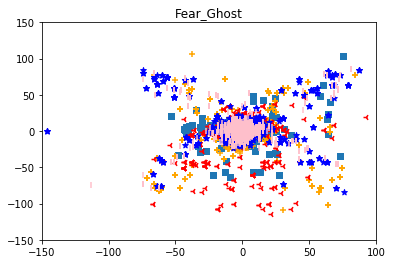

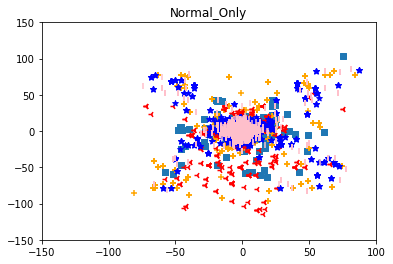

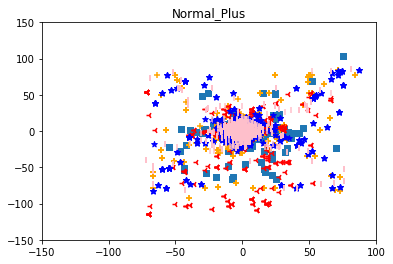

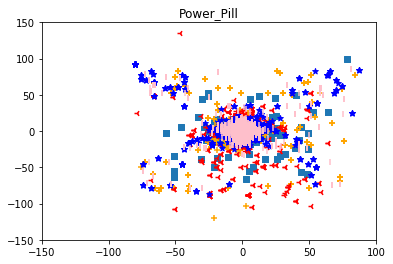

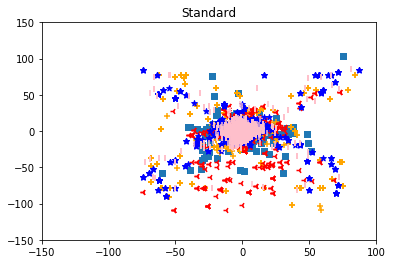

In [98]:
for index, agent in enumerate(df_list):
    x,y = zip(*agent['pacman_direction'])
    plt.scatter(x,y,data=agent, marker=",")
    x,y = zip(*agent['orange_ghost_direction'])
    plt.scatter(x,y,data=agent, c="orange", marker="+")
    x,y = zip(*agent['red_ghost_direction'])
    plt.scatter(x,y,data=agent, c="r", marker="3")
    x,y = zip(*agent['blue_ghost_direction'])
    plt.scatter(x,y,data=agent, c="b", marker="*")
    x,y = zip(*agent['pink_ghost_direction'])
    plt.scatter(x,y,data=agent, c="pink", marker="|")
    plt.title(names[index])
    plt.xlim(-150,100)
    plt.ylim(-150,150)
    plt.show()

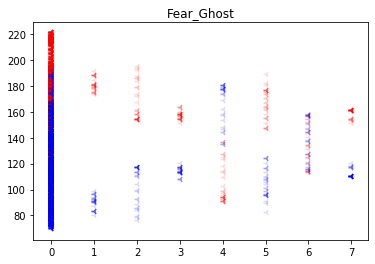

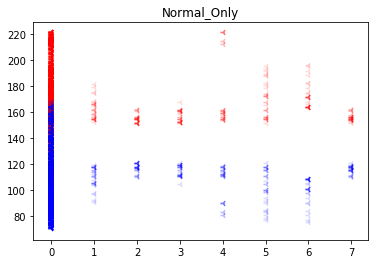

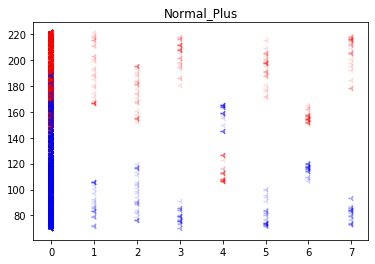

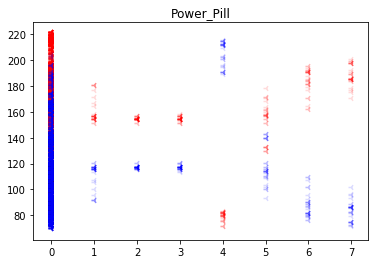

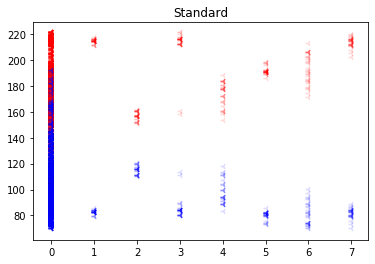

In [113]:
for index, agent in enumerate(df_list):
    plt.scatter("keyNum","to_top_pills_mean",data=agent,alpha=0.14, c="r", marker="3")
    plt.scatter("keyNum","to_bottom_pills_mean",data=agent,alpha=0.14, c="b", marker="3")
    plt.title(names[index])
    plt.show()

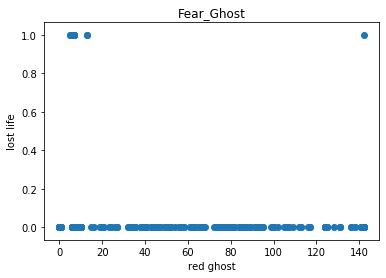

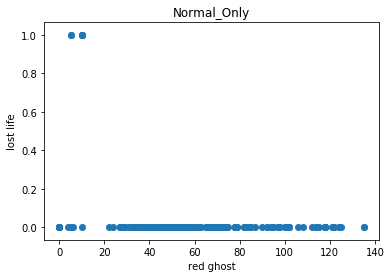

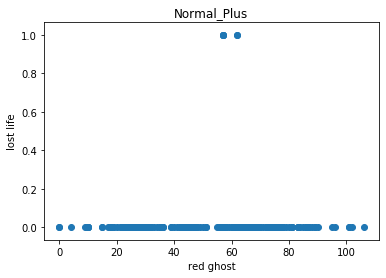

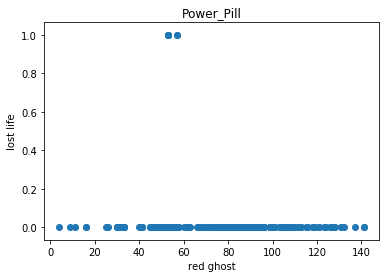

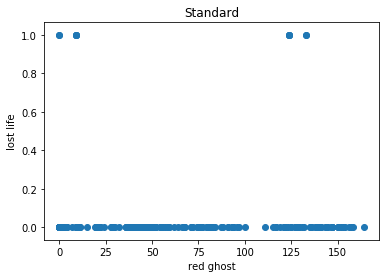

In [115]:

for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    plt.scatter("to_red_ghost","beforeLifeLoss", data=temp)
    plt.title(names[index])
    plt.xlabel("red ghost")
    plt.ylabel("lost life")
    plt.show()

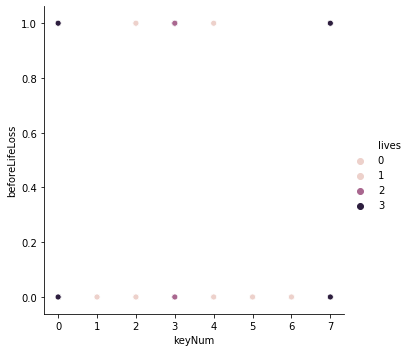

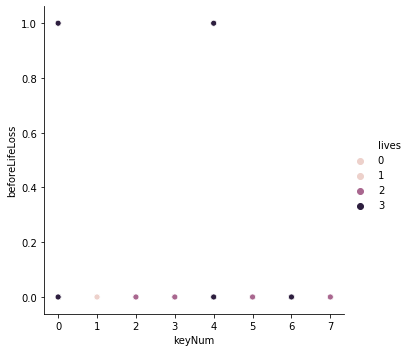

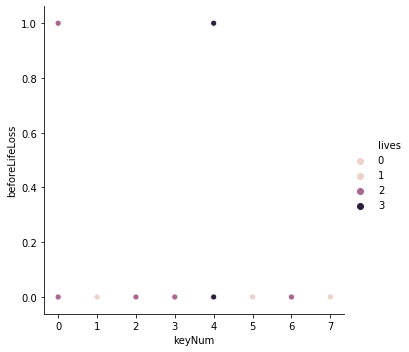

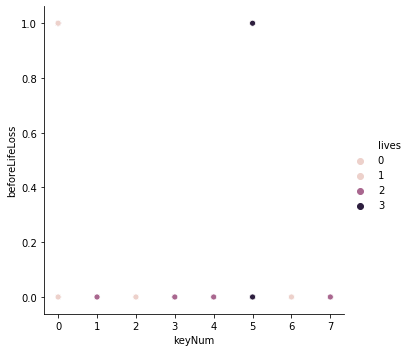

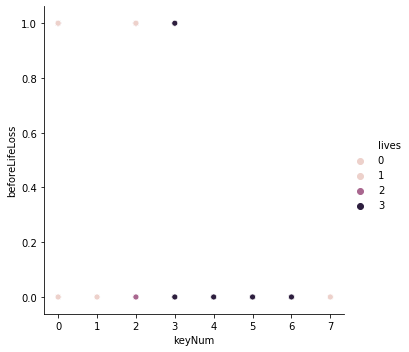

In [117]:
for index, agent in enumerate(df_list):
    sns.relplot(x="keyNum", y="beforeLifeLoss",hue="lives", data=agent)

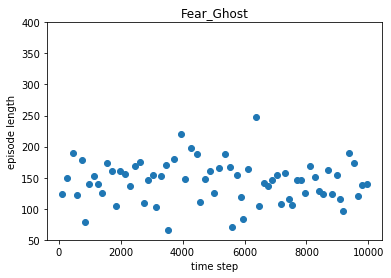

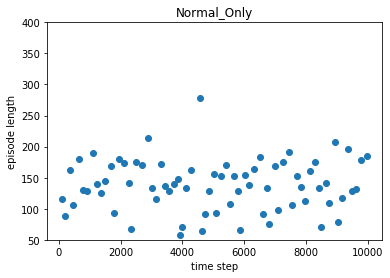

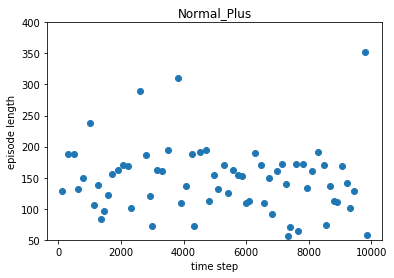

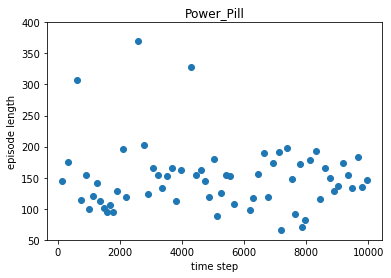

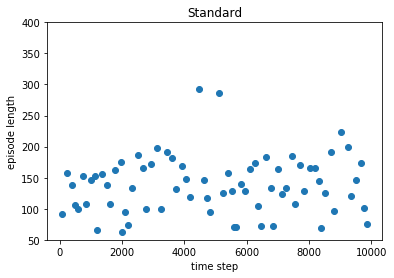

In [121]:

for index, agent in enumerate(df_list):
    idx = agent[agent["end_of_episode"]==True].index
    temp = agent.iloc[idx-1]
    plt.scatter("state","episode_step", data=temp)
    plt.title(names[index])
    plt.xlabel("time step")
    plt.ylabel("episode length")
    plt.ylim(50,400)
    plt.show()

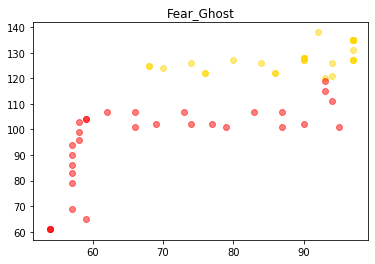

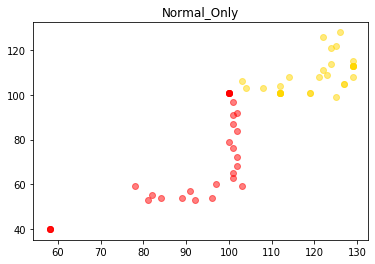

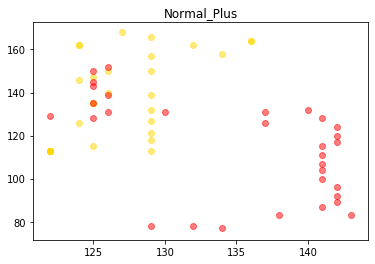

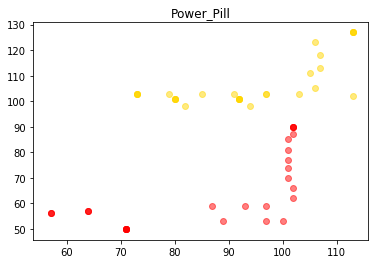

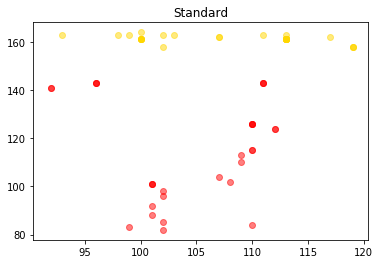

In [123]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]==1]
    plt.scatter("pacman_coord_x", "pacman_coord_y", alpha=0.5, c="gold", data=temp)
    plt.scatter("red_ghost_coord_x", "red_ghost_coord_y", alpha=0.5, c="r", data=temp)
    plt.title(names[index])
    plt.legend
    plt.show()

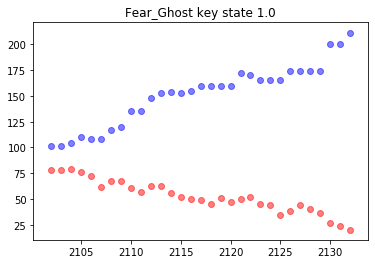

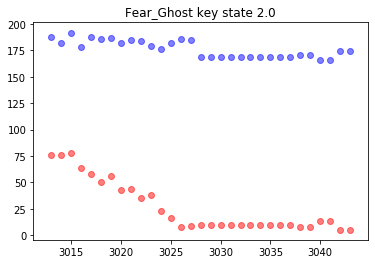

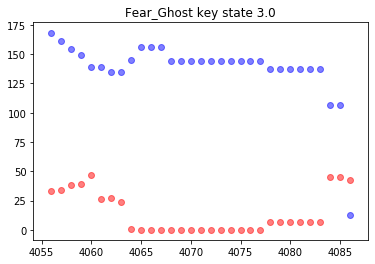

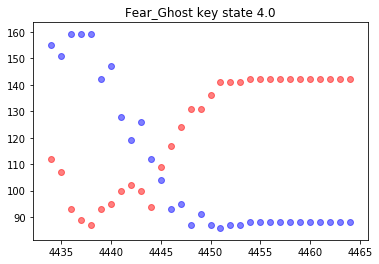

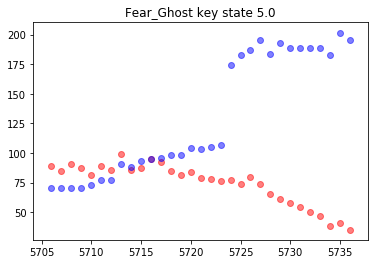

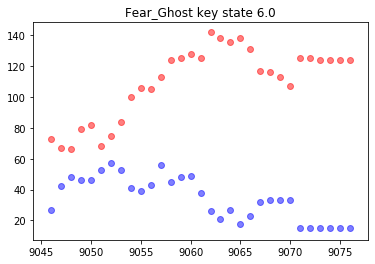

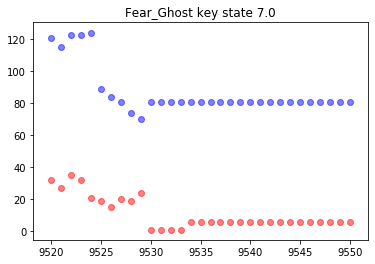

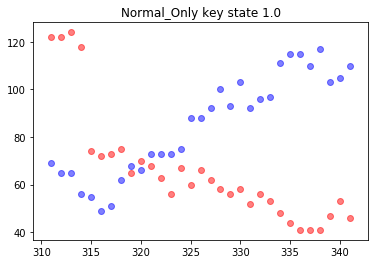

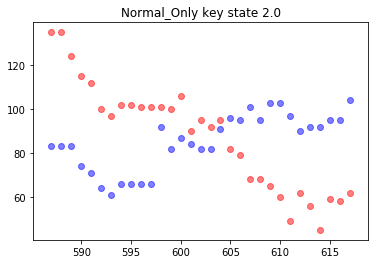

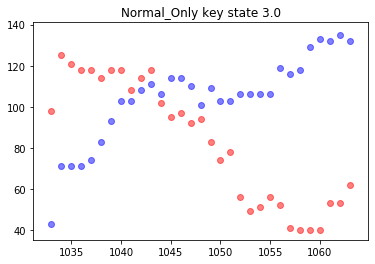

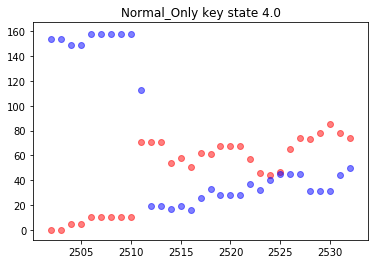

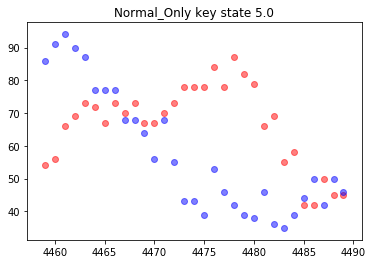

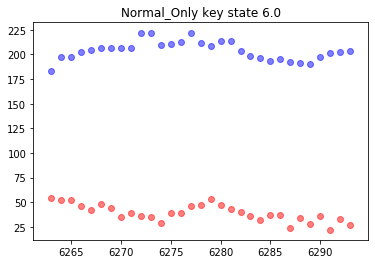

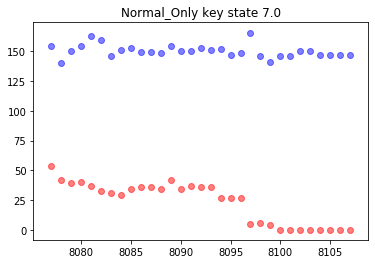

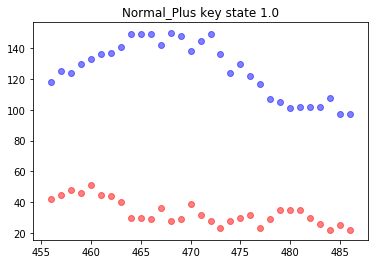

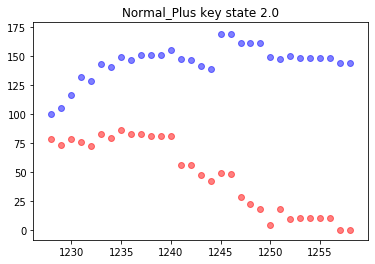

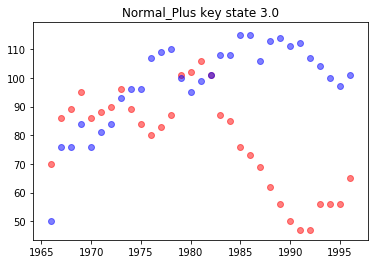

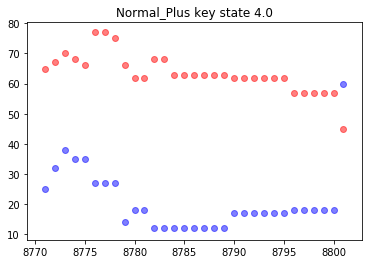

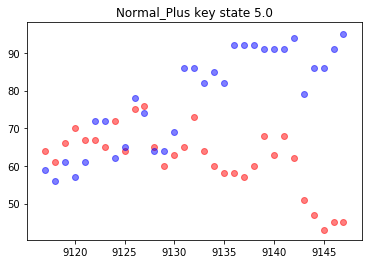

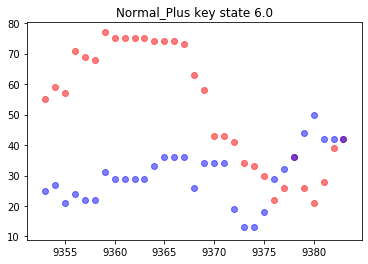

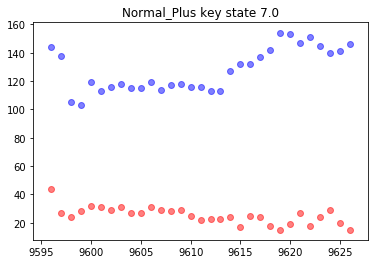

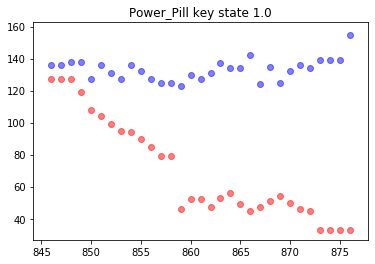

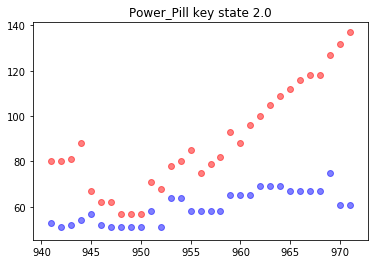

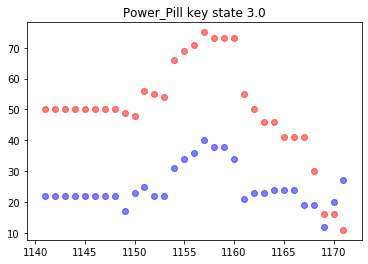

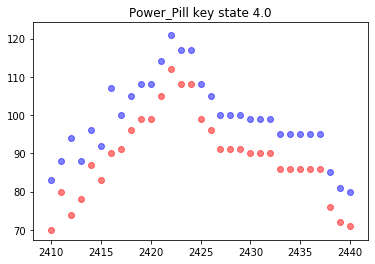

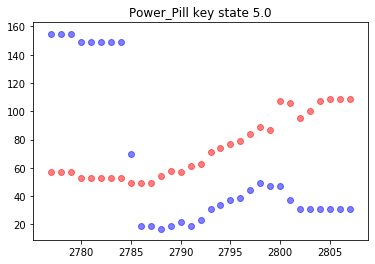

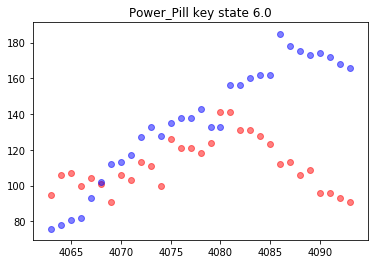

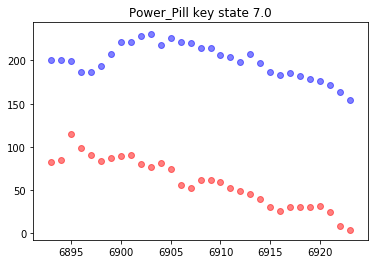

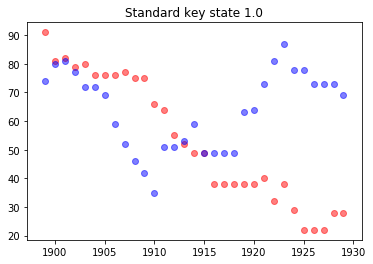

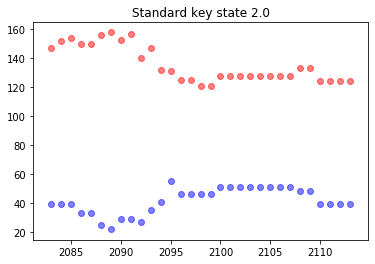

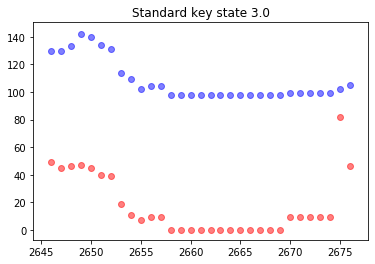

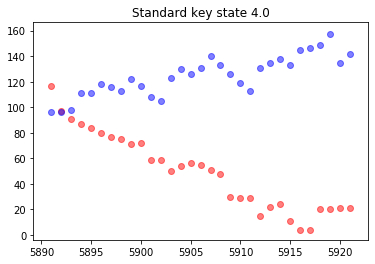

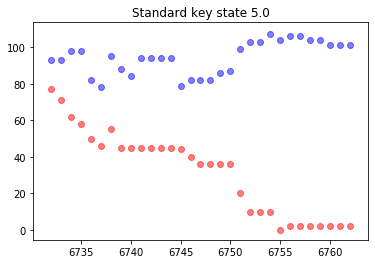

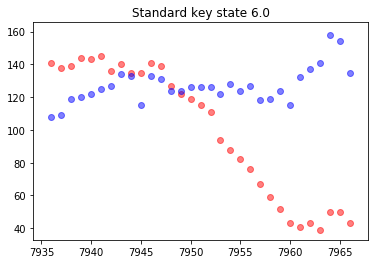

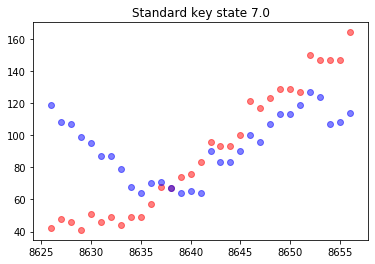

In [134]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    for num in temp.keyNum.unique():
        temp2 = temp[temp["keyNum"]==num]
        plt.scatter("state", "to_red_ghost", alpha=0.5, c="r", data=temp2)
        plt.scatter("state", "to_blue_ghost", alpha=0.5, c="b", data=temp2)
#         xcoords = temp2[temp2['lives']==1]
#         for xc in xcoords:
#             plt.axvline(x=xc)
        plt.title(names[index] + " key state " + str(num))
        plt.legend
        plt.show()

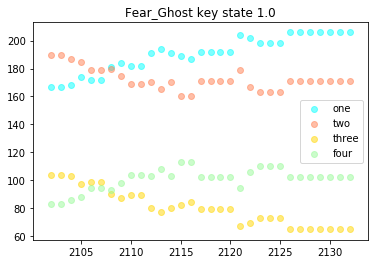

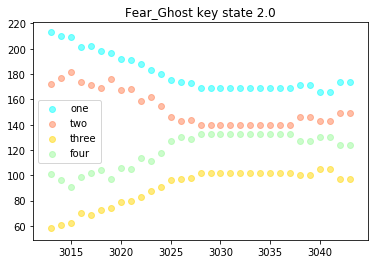

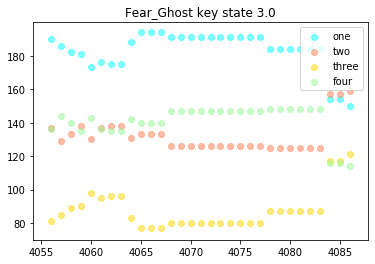

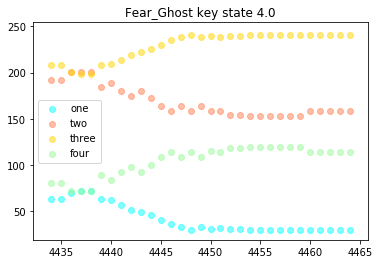

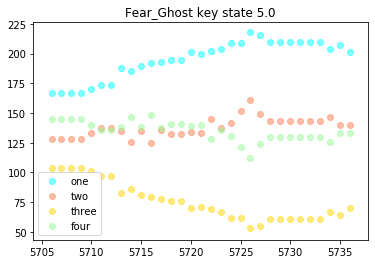

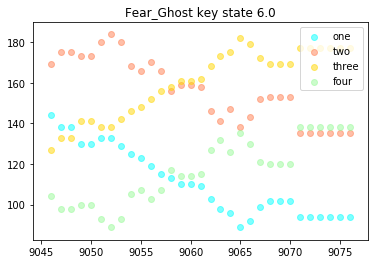

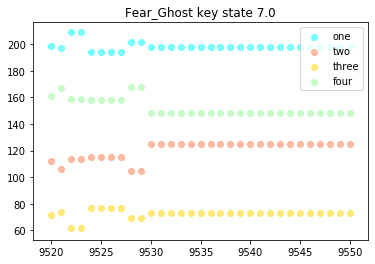

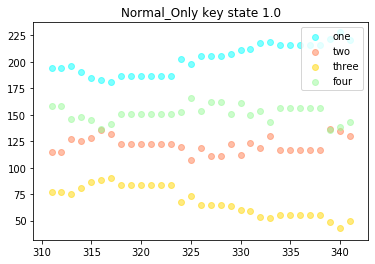

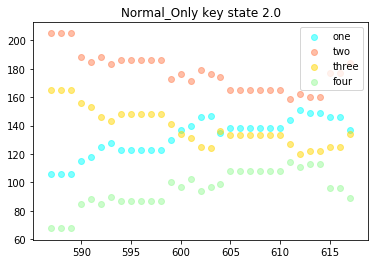

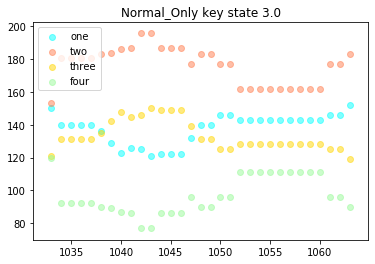

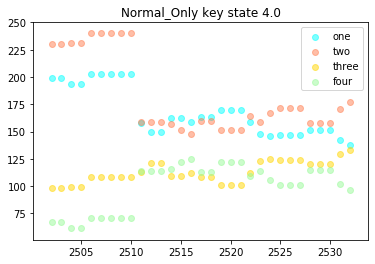

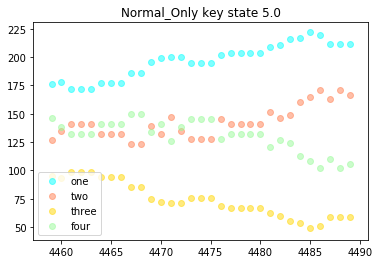

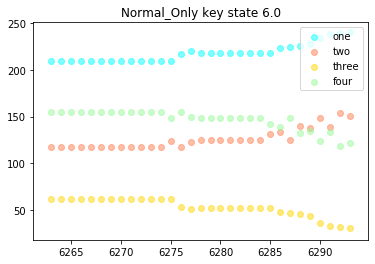

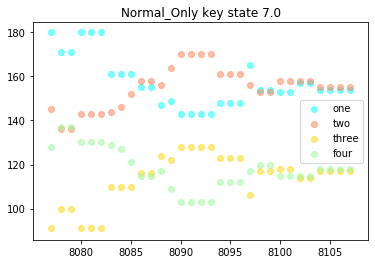

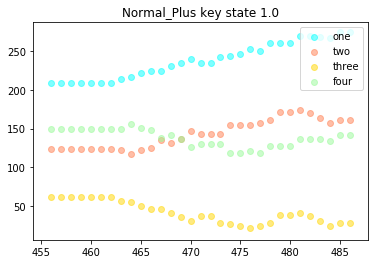

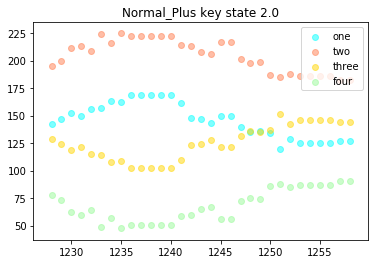

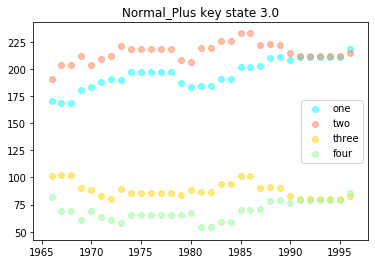

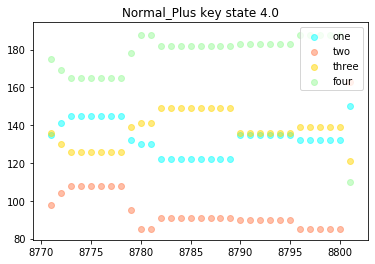

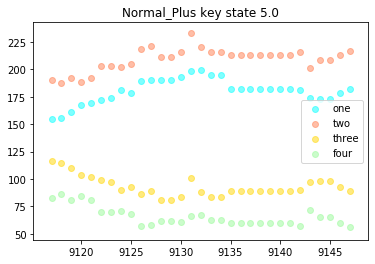

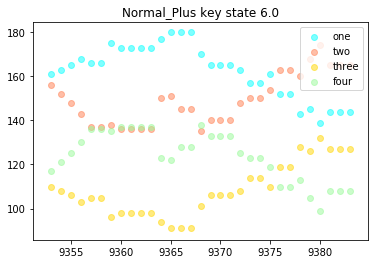

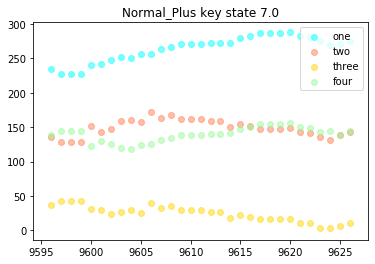

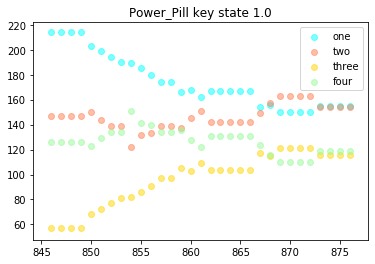

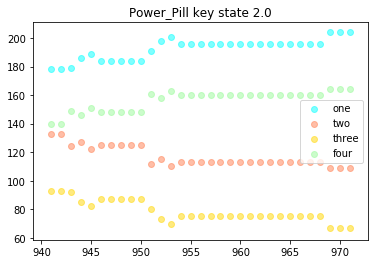

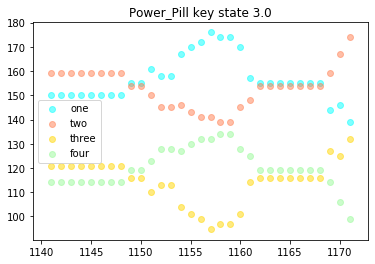

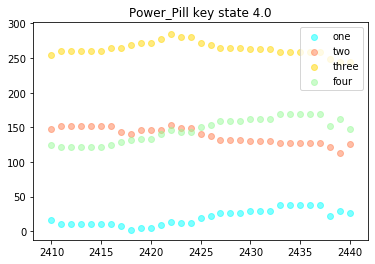

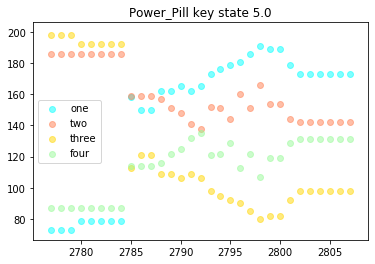

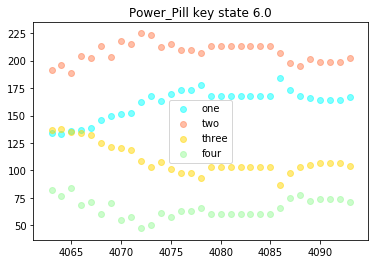

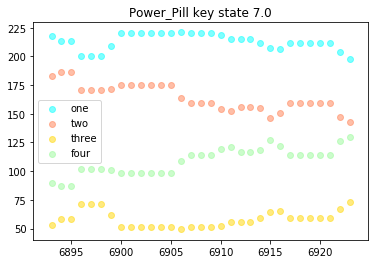

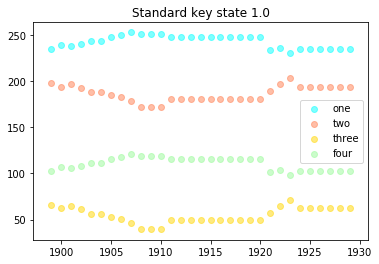

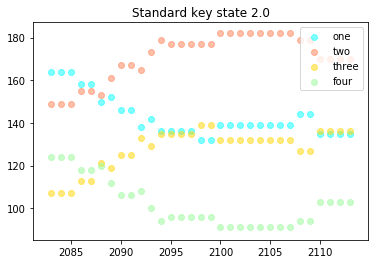

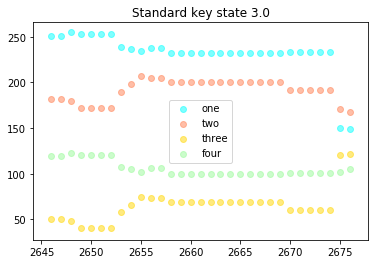

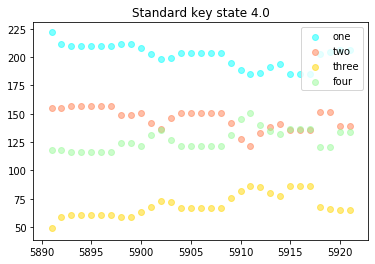

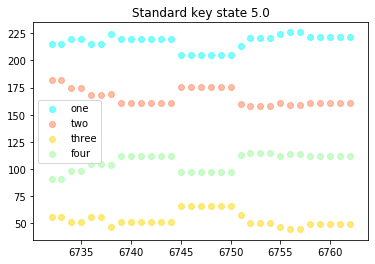

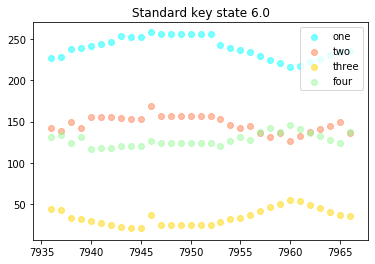

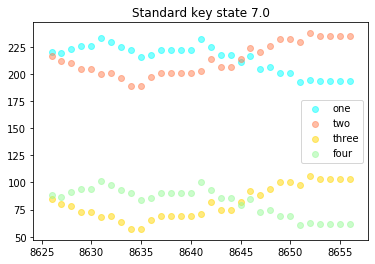

In [140]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    for num in temp.keyNum.unique():
        temp2 = temp[temp["keyNum"]==num]
        plt.scatter("state", "to_pill_one", alpha=0.5, c="cyan", data=temp2, label="one")
        plt.scatter("state", "to_pill_two", alpha=0.5, c="coral", data=temp2, label="two")
        plt.scatter("state", "to_pill_three", alpha=0.5, c="gold", data=temp2, label="three")
        plt.scatter("state", "to_pill_four", alpha=0.5, c="palegreen", data=temp2, label="four")
#         xcoords = temp2[temp2['lives']==1]
#         for xc in xcoords:
#             plt.axvline(x=xc)
        plt.title(names[index] + " key state " + str(num))
        plt.legend(loc="best")
        plt.show()

In [144]:
combo_df.columns

Index(['reward', 'episode_reward', 'epoch_reward', 'total_reward', 'lives',
       'end_of_episode', 'end_of_epoch', 'episode', 'episode_step', 'epoch',
       'epoch_step', 'state', 'mean_reward', 'to_pill_one', 'to_pill_two',
       'to_pill_three', 'to_pill_four', 'to_red_ghost', 'to_pink_ghost',
       'to_blue_ghost', 'to_orange_gohst', 'pacman_coord_x', 'pacman_coord_y',
       'red_ghost_coord_x', 'red_ghost_coord_y', 'pink_ghost_coord_x',
       'pink_ghost_coord_y', 'blue_ghost_coord_x', 'blue_ghost_coord_y',
       'orange_ghost_coord_x', 'orange_ghost_coord_y', 'pacman_direction',
       'red_ghost_direction', 'pink_ghost_direction', 'blue_ghost_direction',
       'orange_ghost_direction', 'dark_blue_ghost1_coord_x',
       'dark_blue_ghost1_coord_y', 'dark_blue_ghost2_coord_x',
       'dark_blue_ghost2_coord_y', 'dark_blue_ghost3_coord_x',
       'dark_blue_ghost3_coord_y', 'dark_blue_ghost4_coord_x',
       'dark_blue_ghost4_coord_y', 'action 1 episode sum',
       'action

In [183]:
subset = combo_df[['pacman_coord_x', 'pacman_coord_y']]
pacman_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost1_coord_x', 'dark_blue_ghost1_coord_y']]
db1_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost2_coord_x', 'dark_blue_ghost2_coord_y']]
db2_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost3_coord_x', 'dark_blue_ghost3_coord_y']]
db3_coord = [np.array(x) for x in subset.to_numpy()]

subset = combo_df[['dark_blue_ghost4_coord_x', 'dark_blue_ghost4_coord_y']]
db4_coord = [np.array(x) for x in subset.to_numpy()]

to_db1 = []
to_db2 = []
to_db3 = []
to_db4 = []
    
for i in range(0,len(pacman_coord)):
    to_db1.append(np.abs(pacman_coord[i] - db1_coord[i]).sum())
    to_db2.append(np.abs(pacman_coord[i] - db2_coord[i]).sum())
    to_db3.append(np.abs(pacman_coord[i] - db3_coord[i]).sum())
    to_db4.append(np.abs(pacman_coord[i] - db4_coord[i]).sum())
                             
combo_df['dist_to_db1'] = to_db1
combo_df['dist_to_db2'] = to_db2
combo_df['dist_to_db3'] = to_db3
combo_df['dist_to_db4'] = to_db4

In [160]:
combo_df['to_db1']

0        179
1        179
2        179
3        174
4        174
        ... 
49960    200
49961    200
49962    200
49963    200
49964    200
Name: to_db1, Length: 49965, dtype: int64

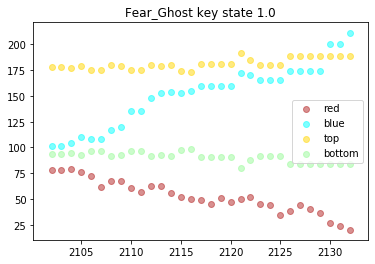

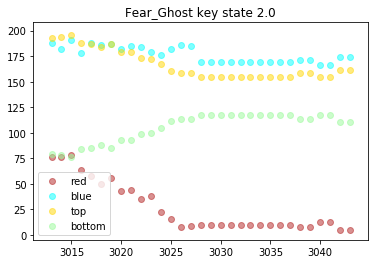

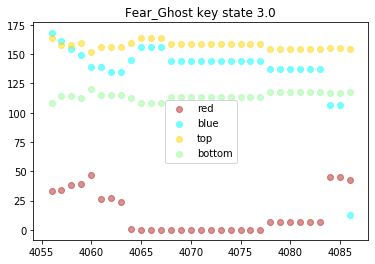

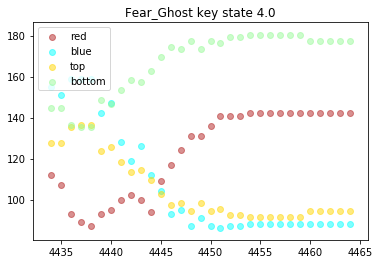

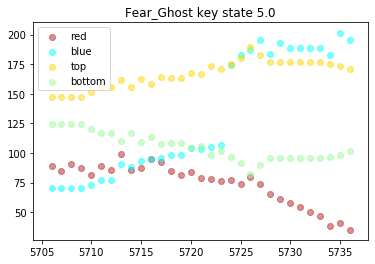

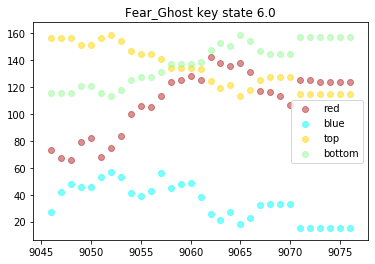

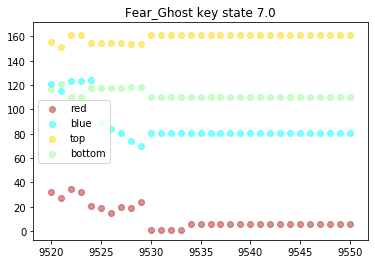

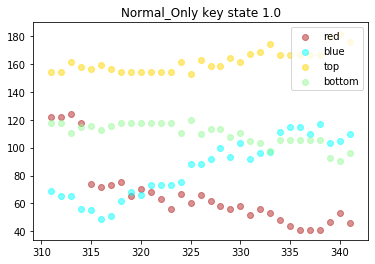

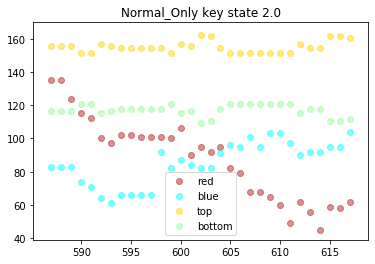

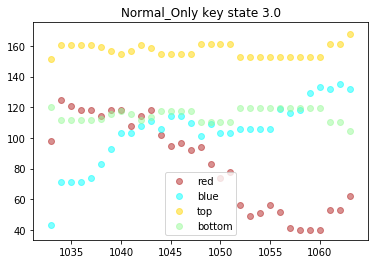

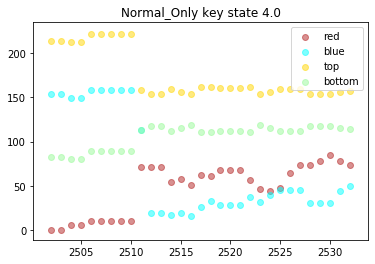

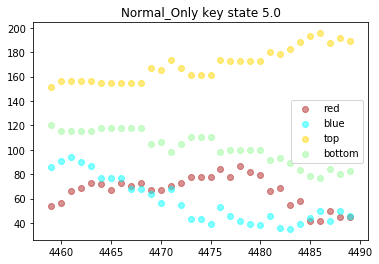

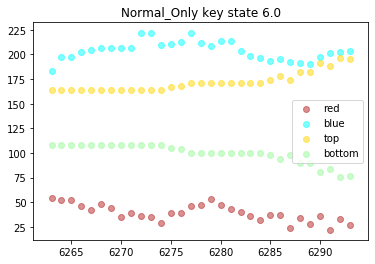

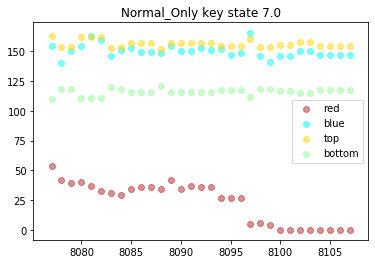

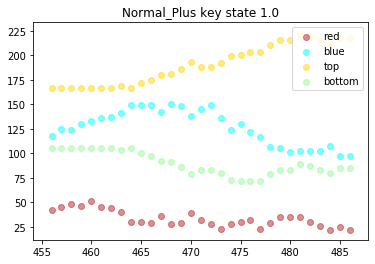

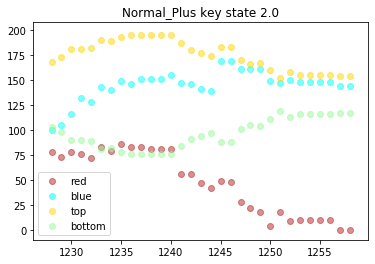

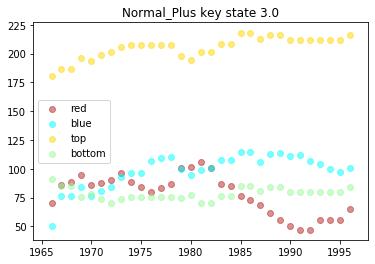

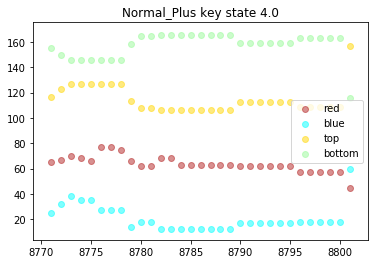

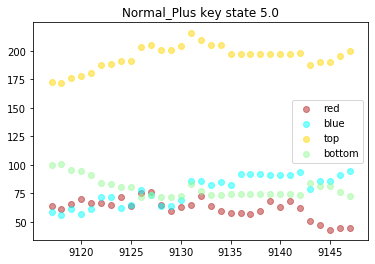

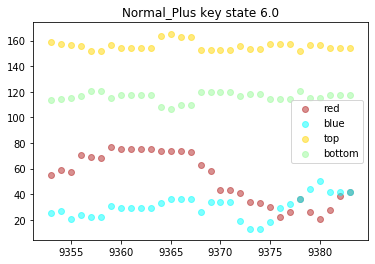

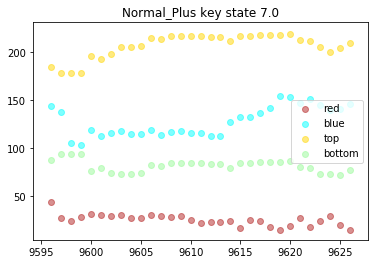

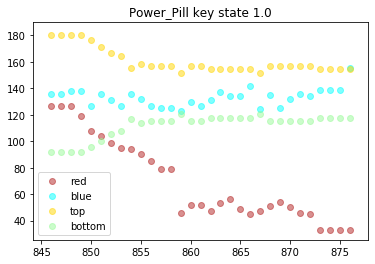

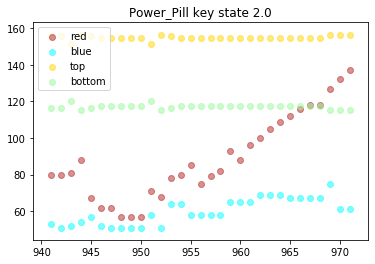

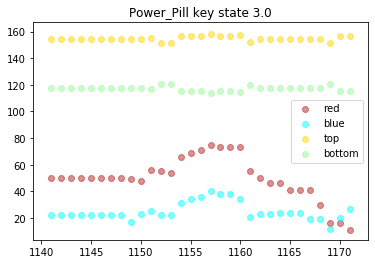

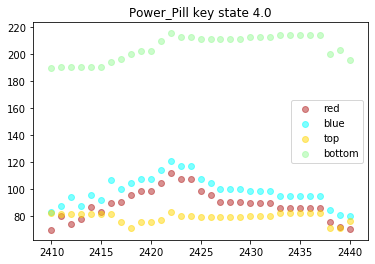

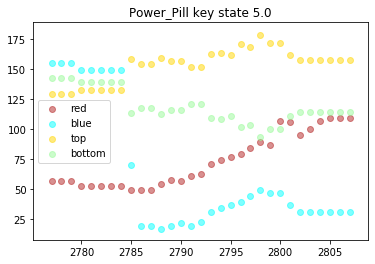

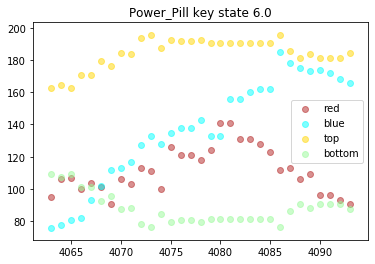

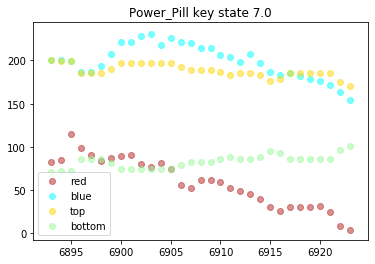

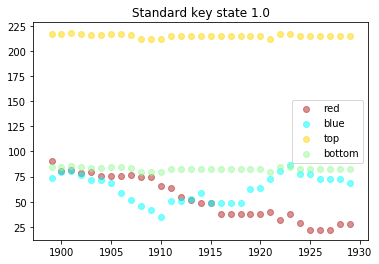

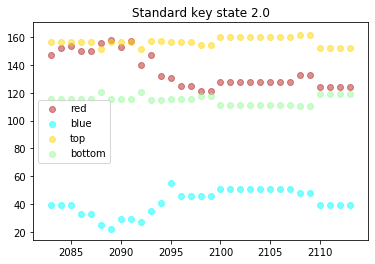

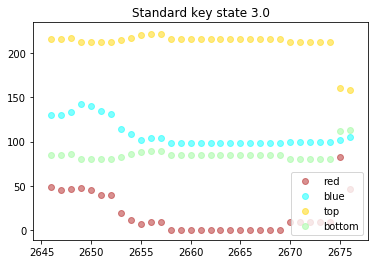

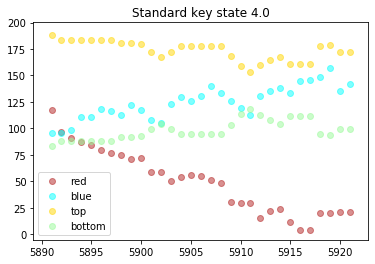

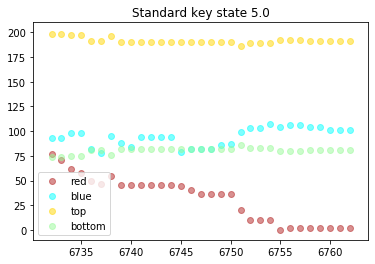

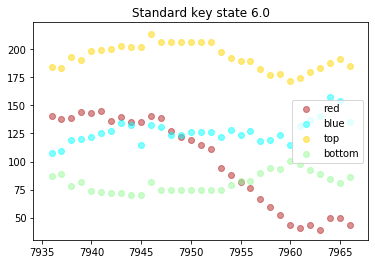

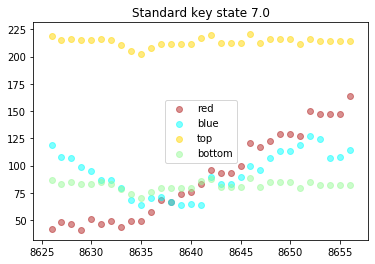

In [143]:
val = 0.1
for index, agent in enumerate(df_list):
    temp = agent[agent["keyNum"]>0]
    for num in temp.keyNum.unique():
        temp2 = temp[temp["keyNum"]==num]
        plt.scatter("state", "to_red_ghost", alpha=0.5, c="firebrick", data=temp2, label="red")
        plt.scatter("state", "to_blue_ghost", alpha=0.5, c="cyan", data=temp2, label="blue")
        plt.scatter("state", "to_top_pills_mean", alpha=0.5, c="gold", data=temp2, label="top")
        plt.scatter("state", "to_bottom_pills_mean", alpha=0.5, c="palegreen", data=temp2, label="bottom")
#         xcoords = temp2[temp2['lives']==1]
#         for xc in xcoords:
#             plt.axvline(x=xc)
        plt.title(names[index] + " key state " + str(num))
        plt.legend(loc="best")
        plt.show()

In [199]:
to_db1[61:65]


[191, 193, 196, 196]

In [164]:
len(combo_df)

49965

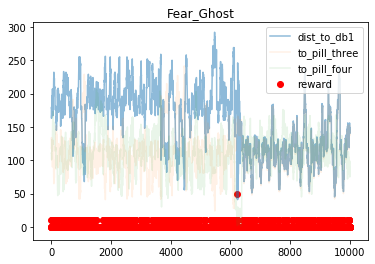

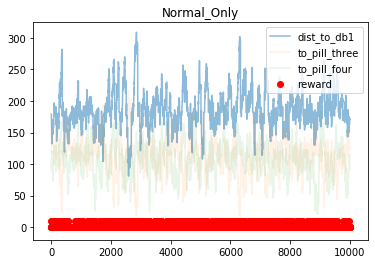

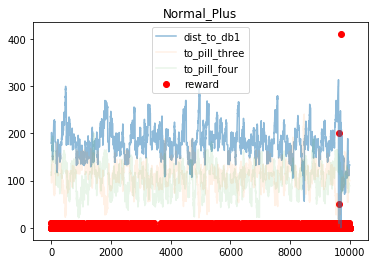

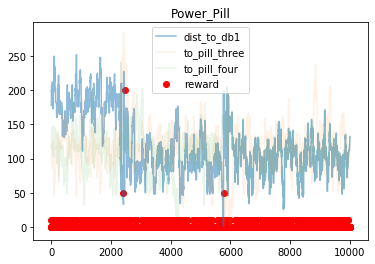

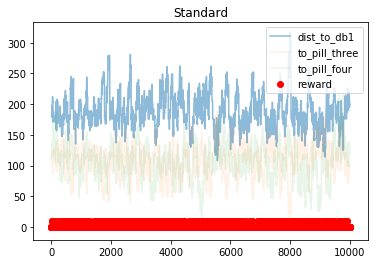

In [217]:
for i in (0,1,2,3,4):
    plt.plot('state', 'dist_to_db1', data=combo_df[combo_df['agentNum']==i], alpha=0.5)
    plt.plot('state', 'to_pill_three', data=combo_df[combo_df['agentNum']==i], alpha=0.1)
    plt.plot('state', 'to_pill_four', data=combo_df[combo_df['agentNum']==i], alpha=0.1)
#     plt.plot('state', 'dist_to_db4', data=combo_df[combo_df['agentNum']==i])
    plt.scatter("state","reward",data = combo_df[combo_df['agentNum']==i], c='r')
    plt.legend(loc="best")
    plt.title(names[i])
    plt.show()

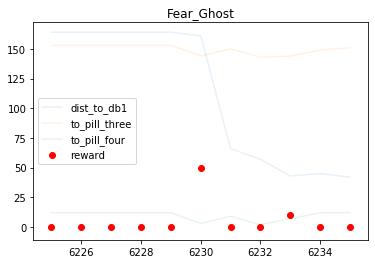

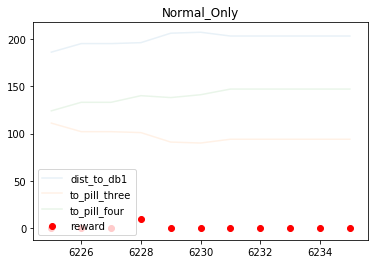

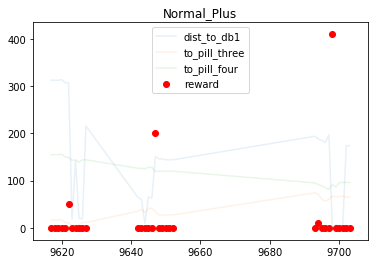

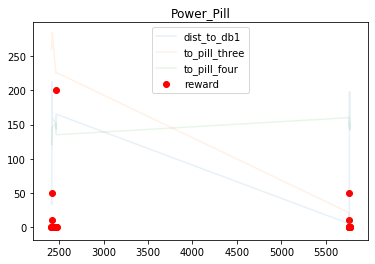

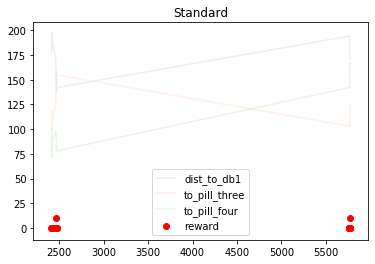

In [206]:

for i in (0,1,2,3,4):
    temp = combo_df[combo_df['agentNum']==i]
    
    plt.plot('state', 'dist_to_db1', data=temp[temp['bigRewardNum']>0], alpha=0.1)
    plt.plot('state', 'to_pill_three', data=temp[temp['bigRewardNum']>0], alpha=0.1)
    plt.plot('state', 'to_pill_four', data=temp[temp['bigRewardNum']>0], alpha=0.1)
#     plt.plot('state', 'dist_to_db4', data=combo_df[combo_df['agentNum']==i])
    plt.scatter("state","reward",data = temp[temp['bigRewardNum']>0], c='r')
    plt.legend(loc="best")
    plt.title(names[i])
    plt.show()
    

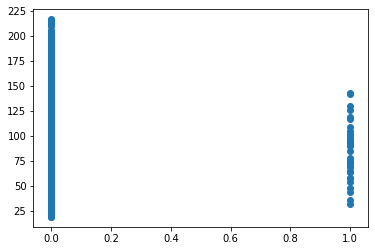

In [210]:
plt.scatter("key_state", "to_ghosts_mean", data=combo_df)

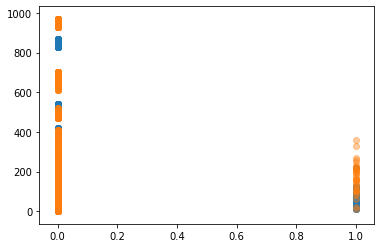

In [213]:
plt.scatter("key_state", "episode_reward", data=combo_df)
plt.scatter("key_state", "epoch_reward", data=combo_df, alpha=0.4)

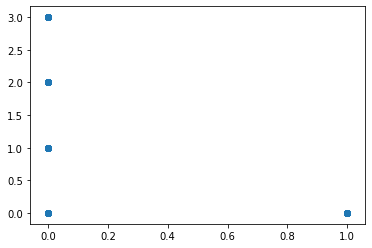

In [216]:
plt.scatter("key_state", "bigRewardNum", data=combo_df, alpha=0.4)